Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

Reading the .csv file

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML PROJECTS/999. Credit Card Fraud Detection/creditcard.csv")
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

Extracting time of the transactions:

In [ ]:
data['Time_hours']=round(data['Time']/3600,0)
data['Hour']=np.nan
for i in range(0,len(data)):
        if data['Time_hours'][i]>23:
            data['Hour'][i]=round(data['Time_hours'][i]-24,0)
        else :
            data['Hour'][i]=round(data['Time_hours'][i],0)
for i in range(0,len(data)):
        if data['Hour'][i]==24:
            data['Hour'][i]=0

data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.219422   

        V28  Amount  Class  Time_hours  Hour  
0 -0.021053  149.62      0         0.0   0.0  
1  0.014724    2.69      0         0.0   0.0  
2 -0.059752  378.66      0         0.0   0.0  
3  0.061458  123.50      0         0.0   0.0  
4  0.215153   69.99      0         0.0   0.0  

[5 rows x 33 columns]

Checking the count of fraud and not-fraud transactions

# EDA

Plotting Fraud vs Not Fraud Transactions

In [ ]:
not_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]
print(f'There are {len(fraud)} fraud data and {len(not_fraud)} non-fraud data')

There are 492 fraud data and 284315 non-fraud data


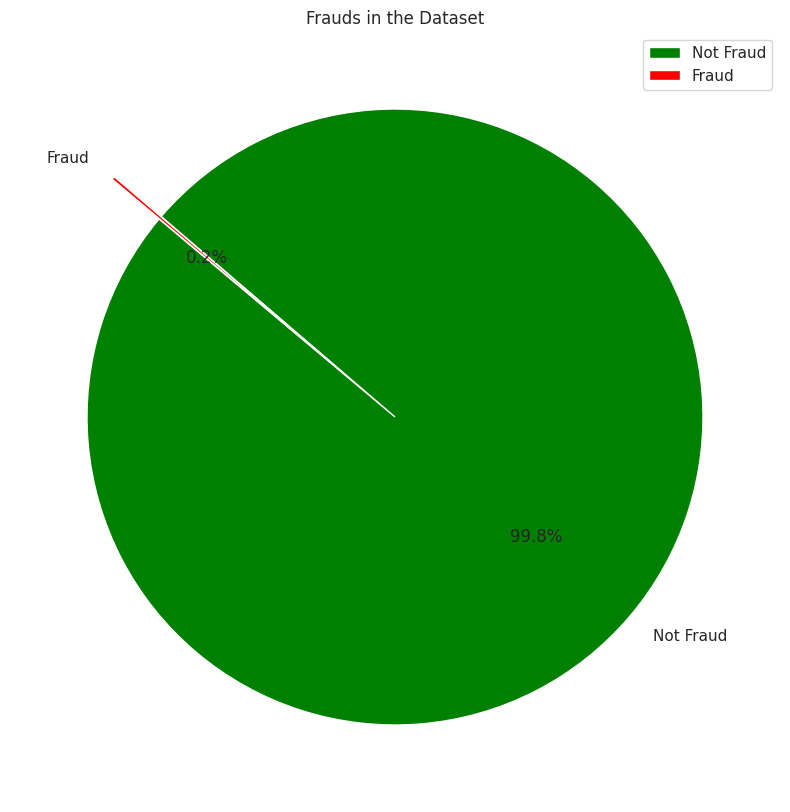

In [ ]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = data['Class'].value_counts(sort = True)

colors = ["green","red"]
explode = (0,0.2)
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)

plt.title('Frauds in the Dataset')
plt.legend()
plt.show()

Grouping transactions based on the hour of the day - plotting the count of total transactions based on hour



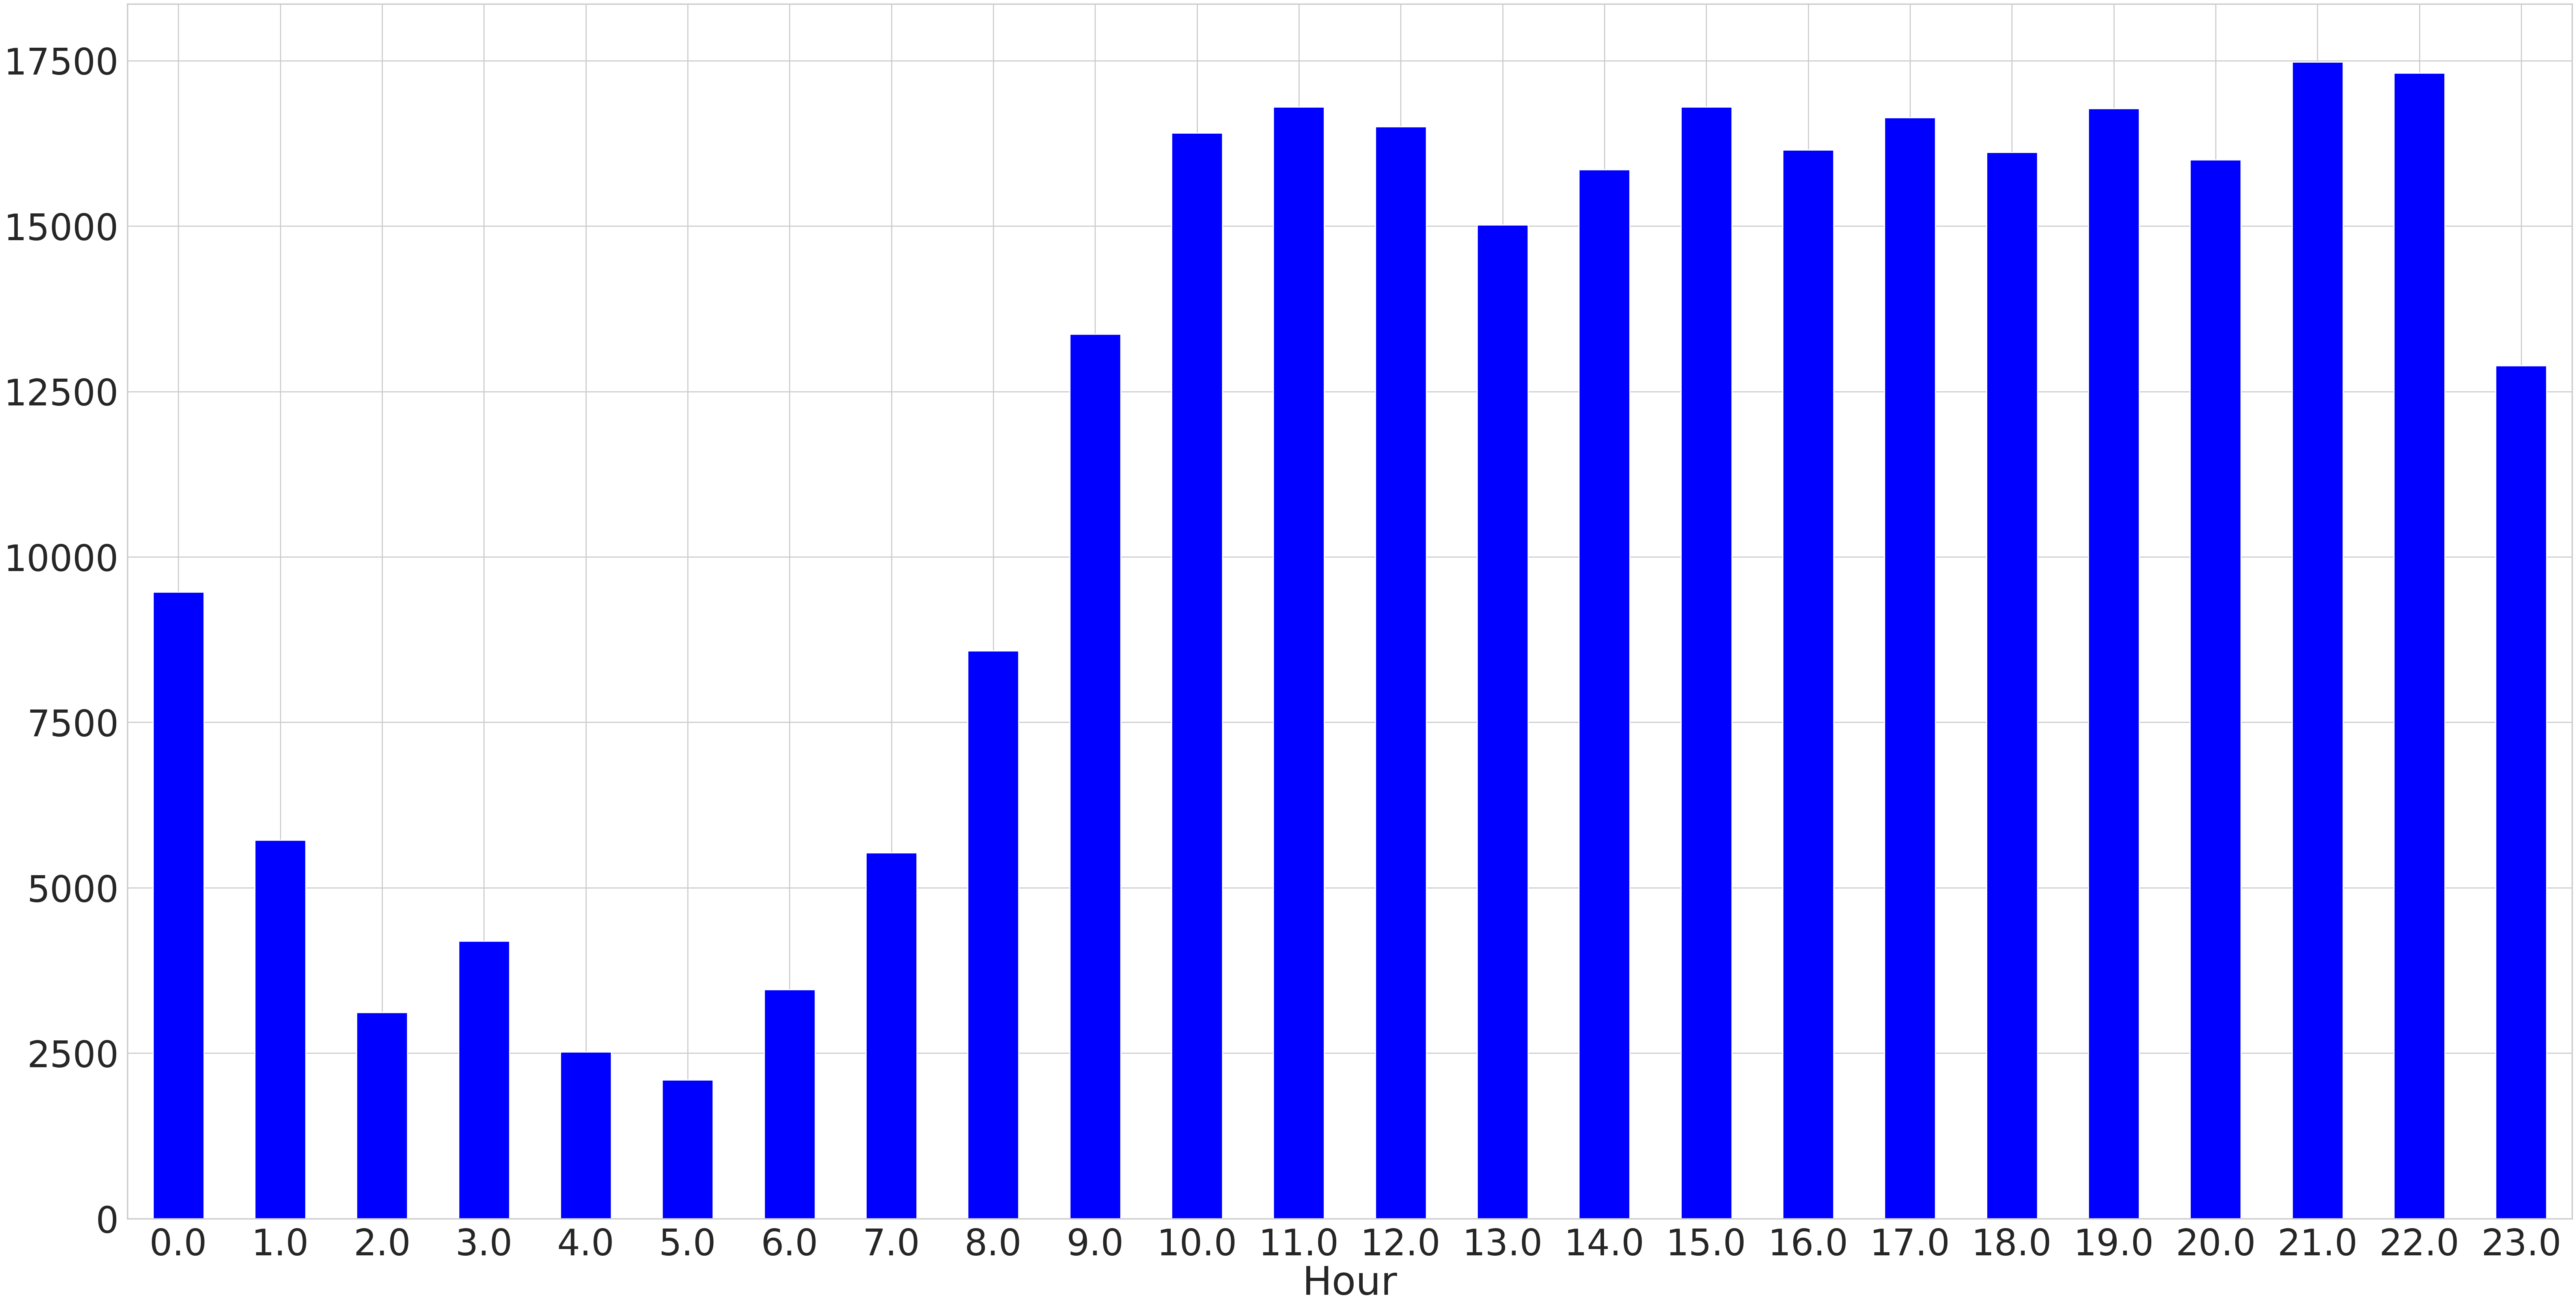

In [ ]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)
data.groupby('Hour')['Time'].count().plot(kind='bar',color='blue')
plt.xticks(rotation=360);

Grouping by data based in Size and Hour feature

In [ ]:
hourly=data.groupby(['Class','Hour']).count()[['Time']].reset_index()

Plotting fraud and non fraud transactions based on hours of the day.



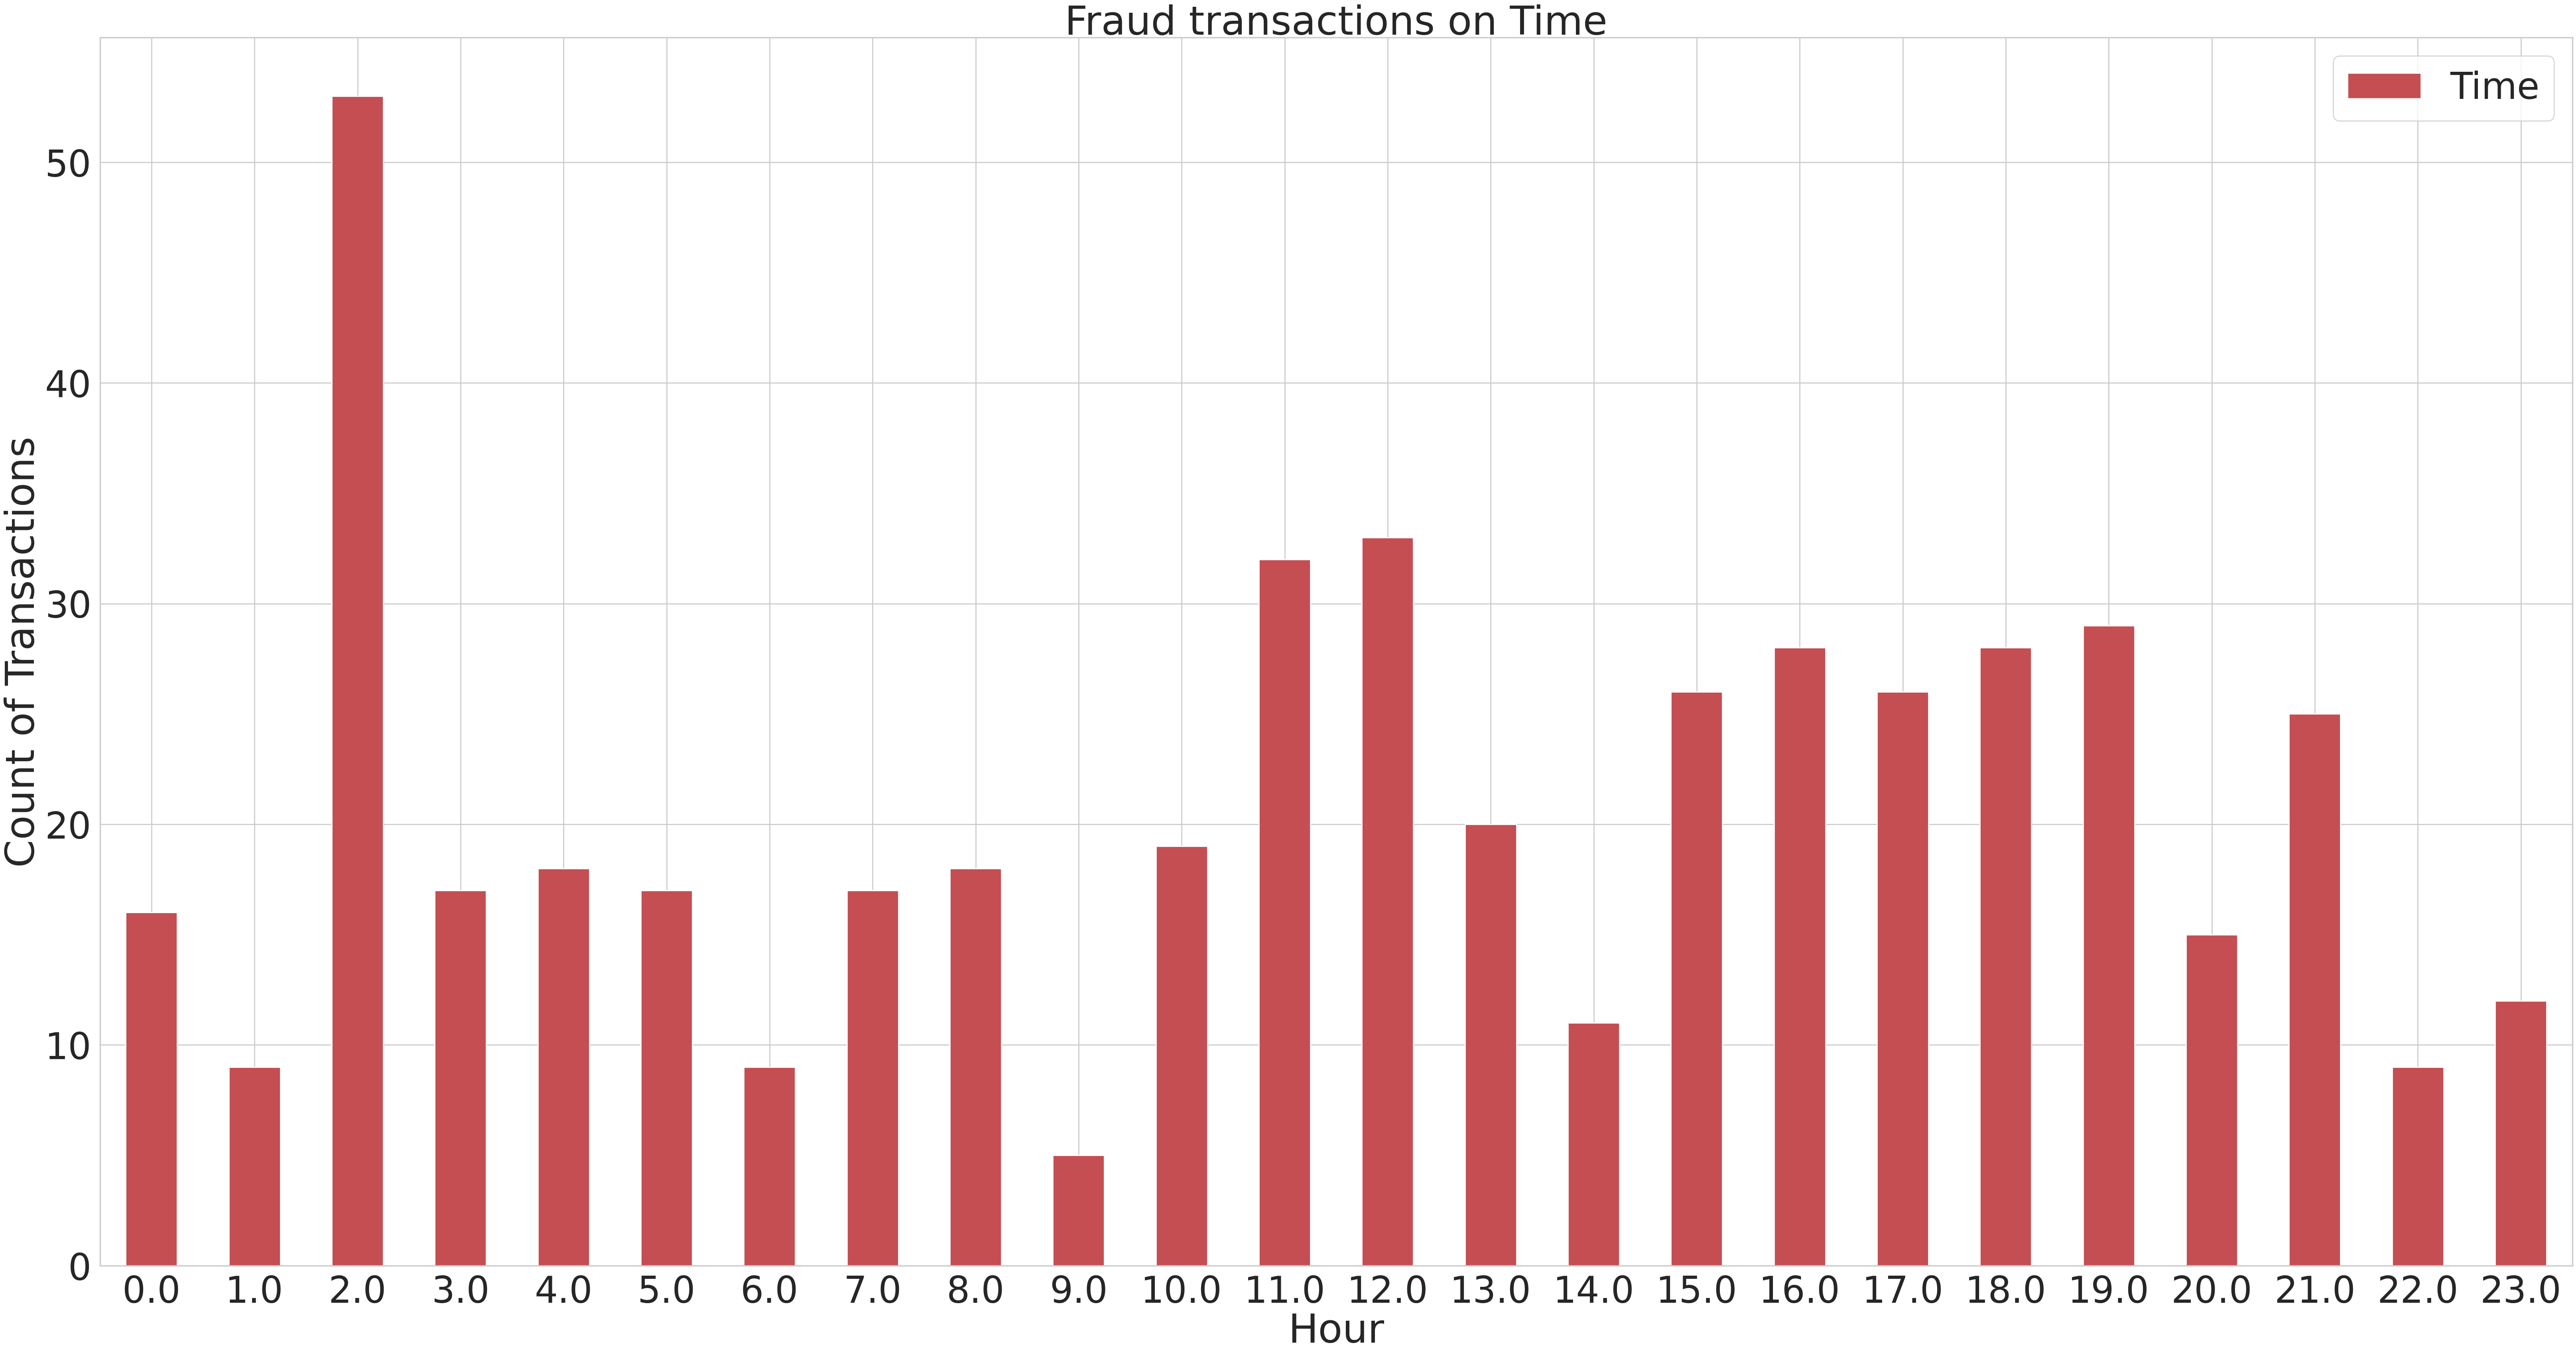

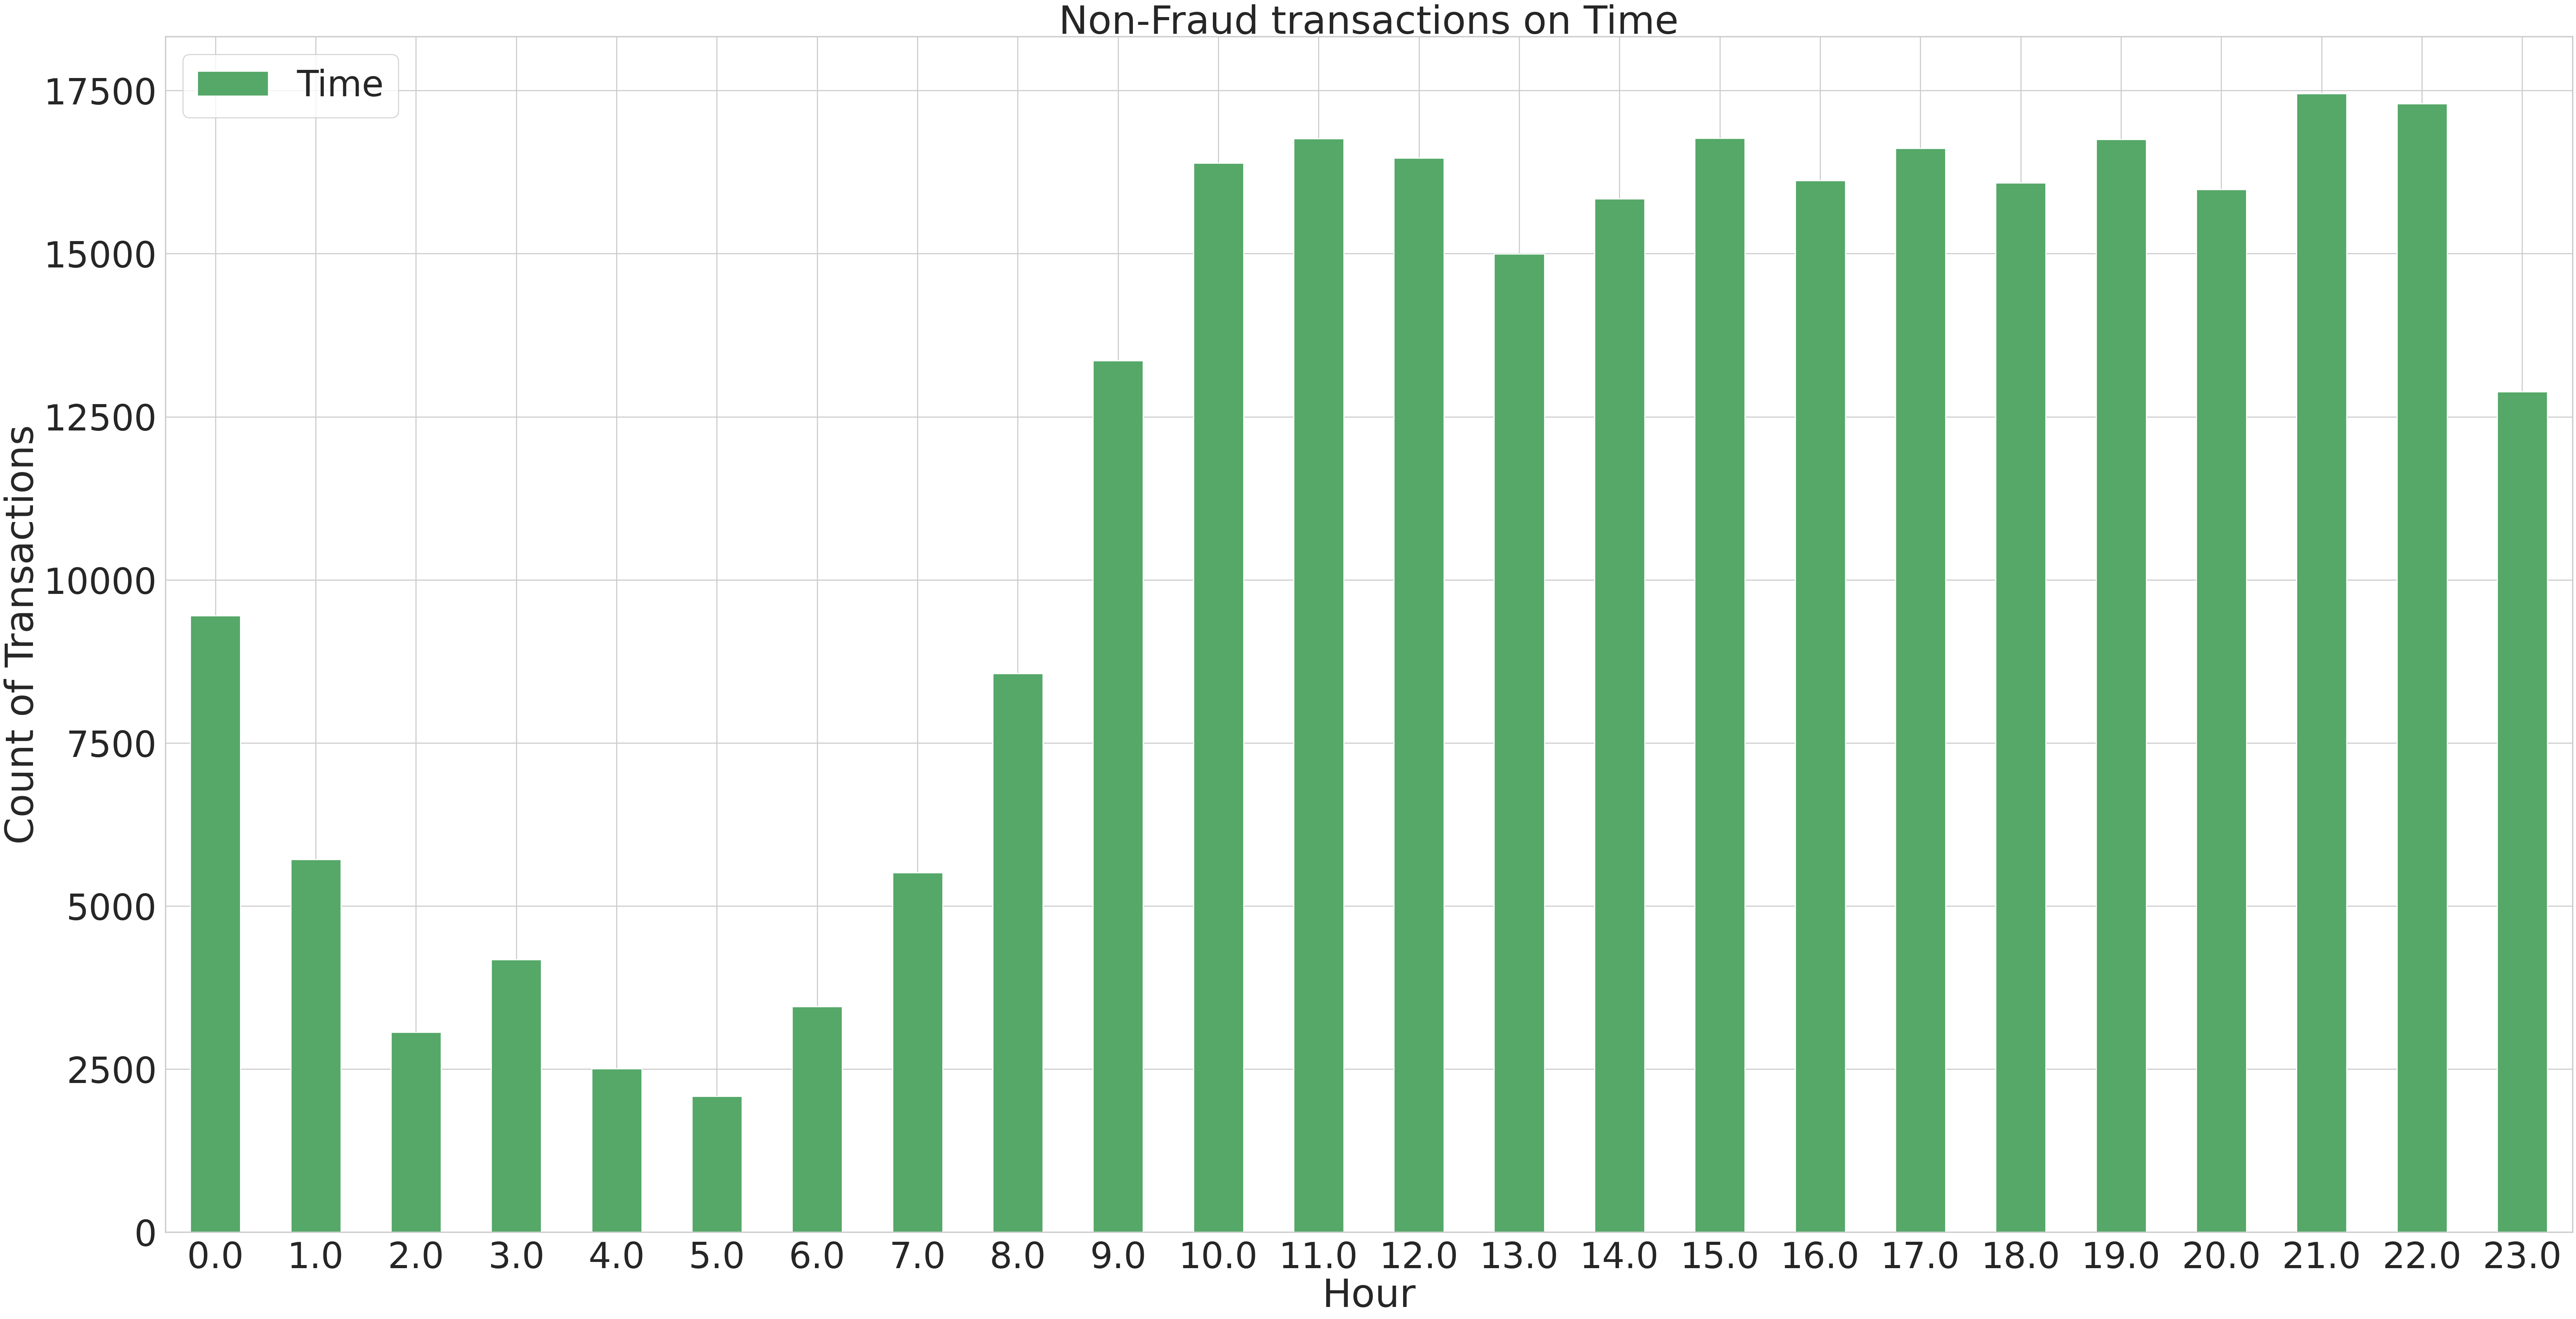

In [ ]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)

hourly[hourly['Class']==1].set_index('Hour')[['Time']].plot(kind='bar',color='r')
plt.xticks(rotation=360);
plt.title('Fraud transactions on Time')
plt.ylabel('Count of Transactions')

hourly[hourly['Class']==0].set_index('Hour')[['Time']].plot(kind='bar',color='g')
plt.xticks(rotation=360);
plt.title('Non-Fraud transactions on Time')
plt.ylabel('Count of Transactions');

In [ ]:
data.isnull().values.any()


False

# Plotting the Distribution of the Fraud and Non-Fraud transactions Amounts.

The dataset provided is basically an imbalanced dataset; The number of non-fraud transactions comprises more than 99%. As the non-fraud transactions are way more than the fraud transactions, putting them on the same scale of mmount is tough. So for the non-fraud transactions, we have scaled the y-axis to a logarithmic scale. This lets us to see skewed data better. Read more about it here : https://bit.ly/3da4HE5

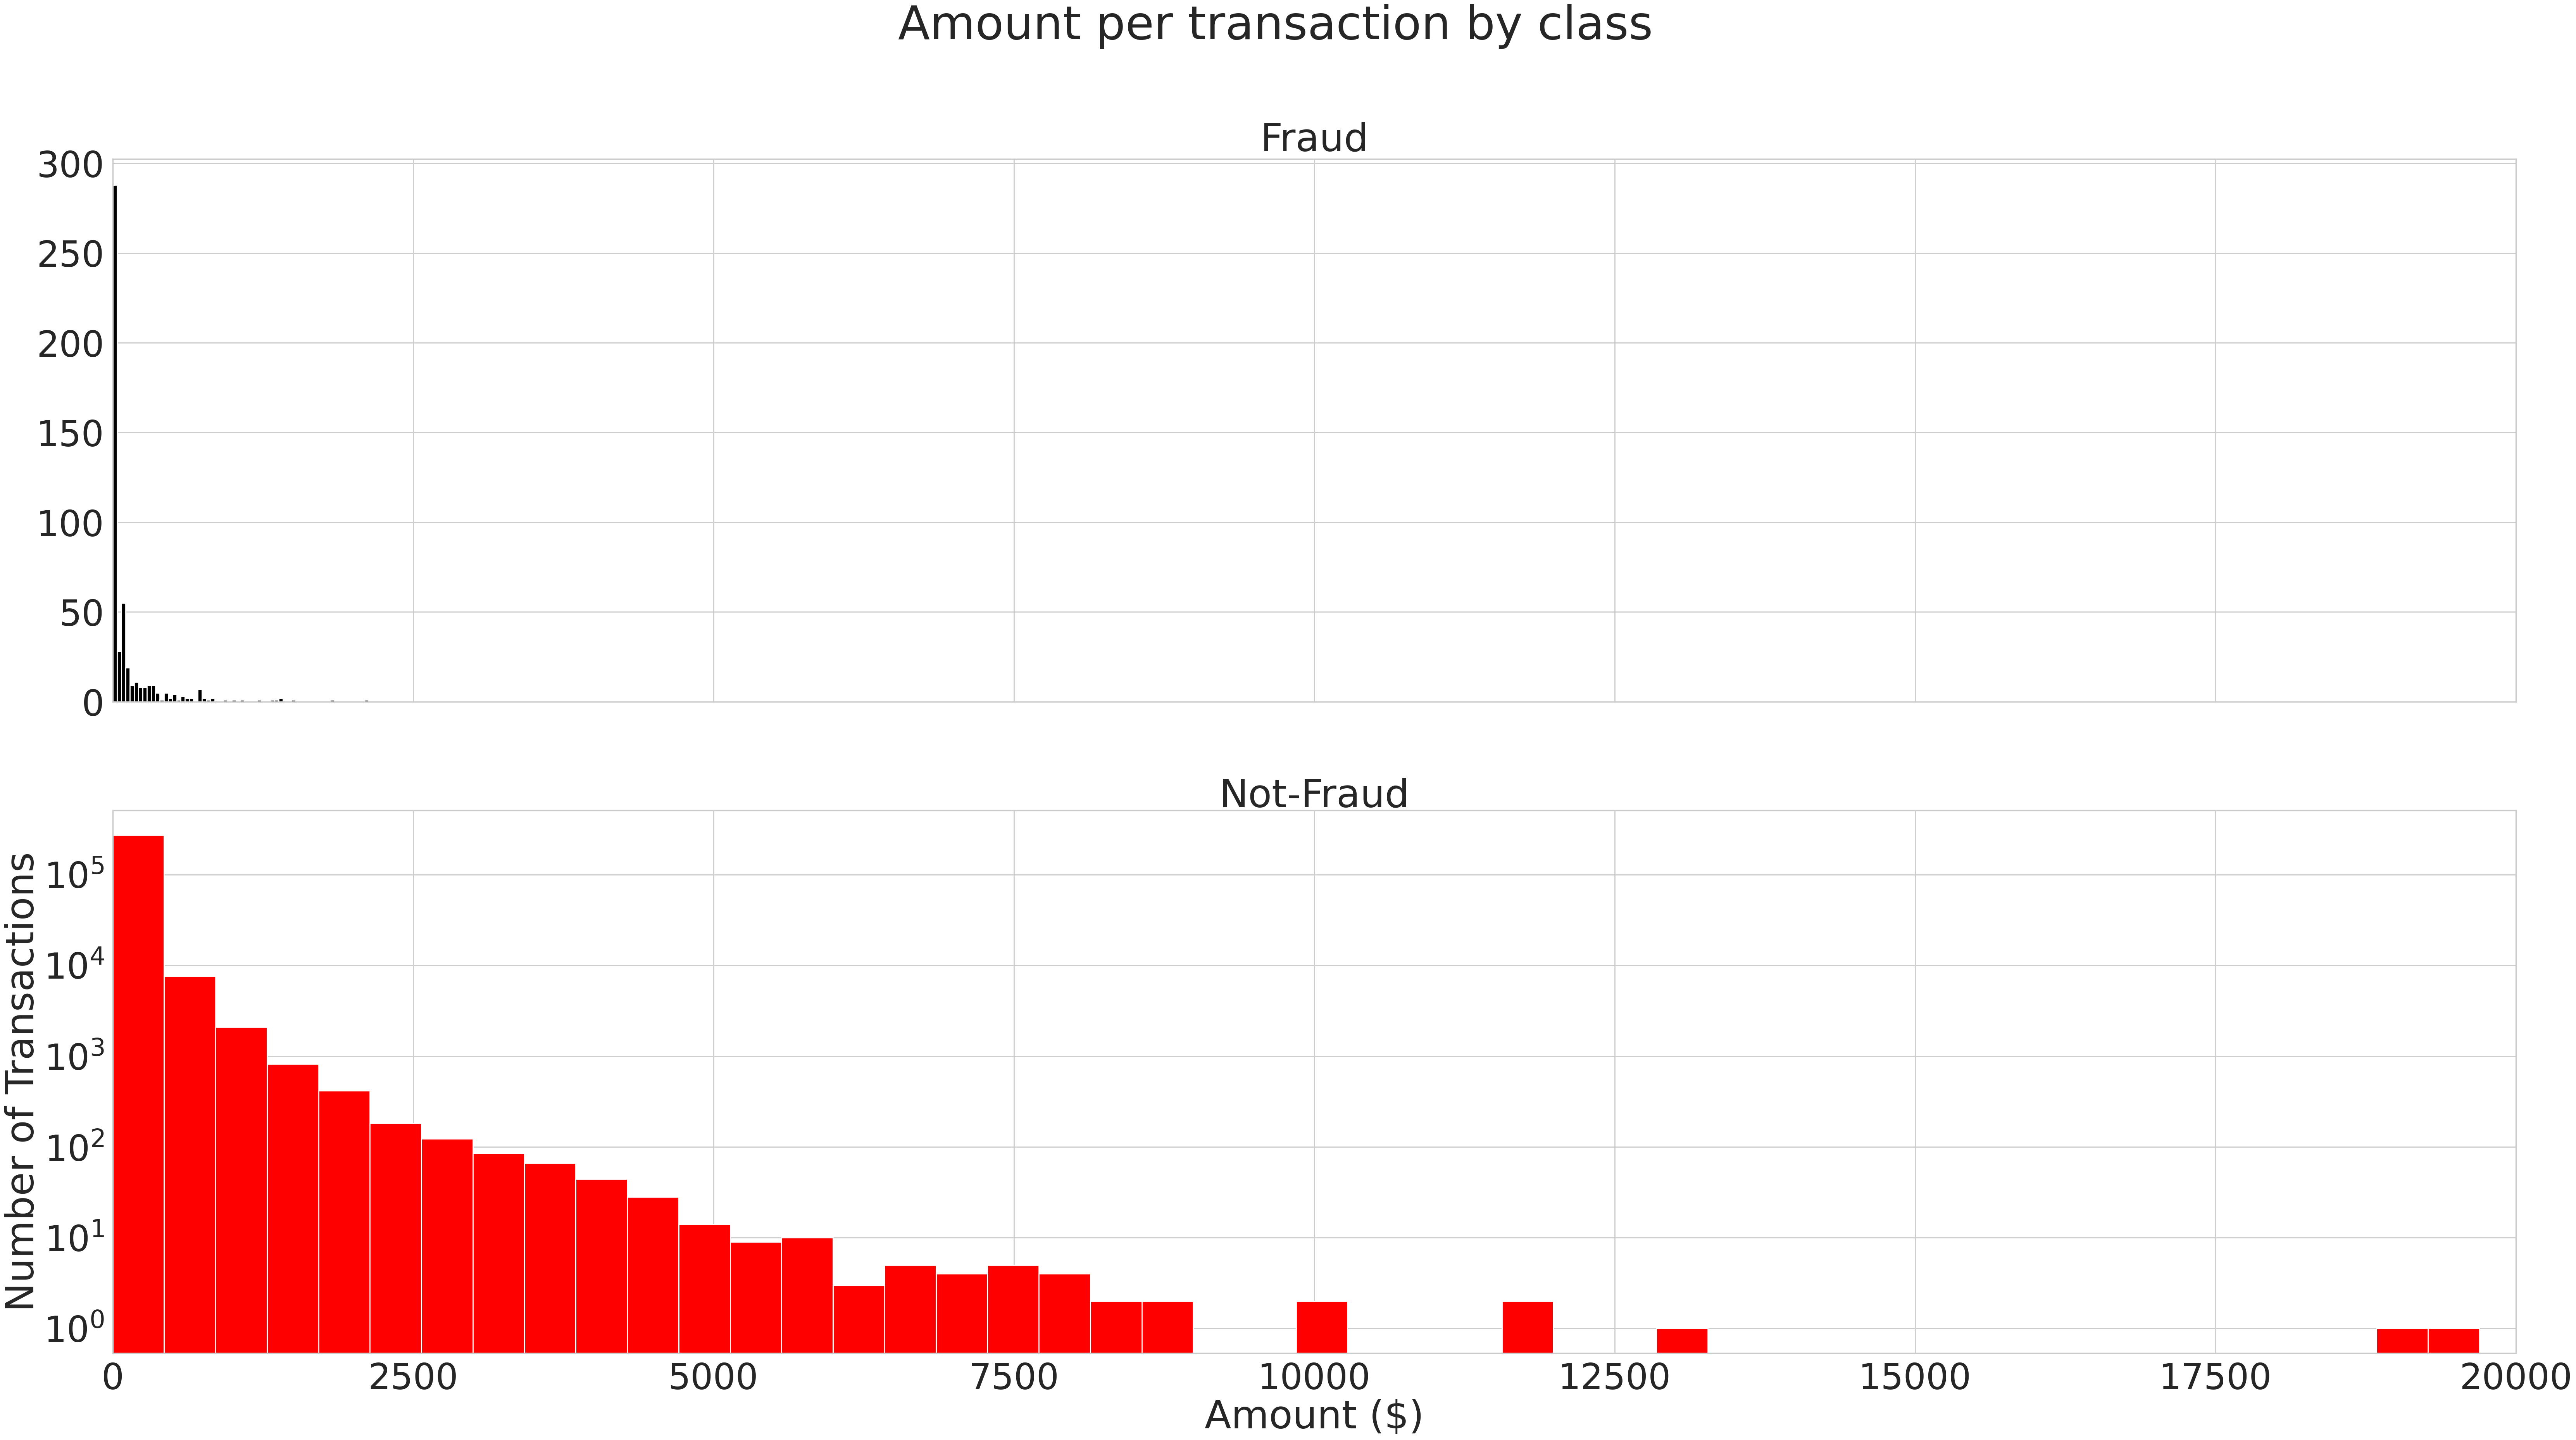

In [ ]:
sns.set_context('poster',font_scale=3.0)
plt.rcParams['figure.figsize']=(80,40)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 60
ax1.hist(fraud.Amount, bins = bins,color='black')
ax1.set_title('Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
ax2.hist(not_fraud.Amount, bins = bins,color='red')
ax2.set_title('Not-Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Predicting Class based on the labels Time and Amount of the transaction.



In [ ]:
X=data[['Time','Amount']]
Y=data[['Class']]

Splitting the data set into train and test.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)

Fitting the model:



In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



A recall of 0% for the fraud transactions implies that the model has not predicted a single fraud transaction and hence we can safely say that this classifier hasnt worked well. This is imperative because we have considered only 3 features out of 31 to build the classifier. Removing the 28 features shows us that the model has not been generalised well, as the class of the model must depend of the removed features.



Plotting the ROC-AUC curve.



ROC AUC: 0.500


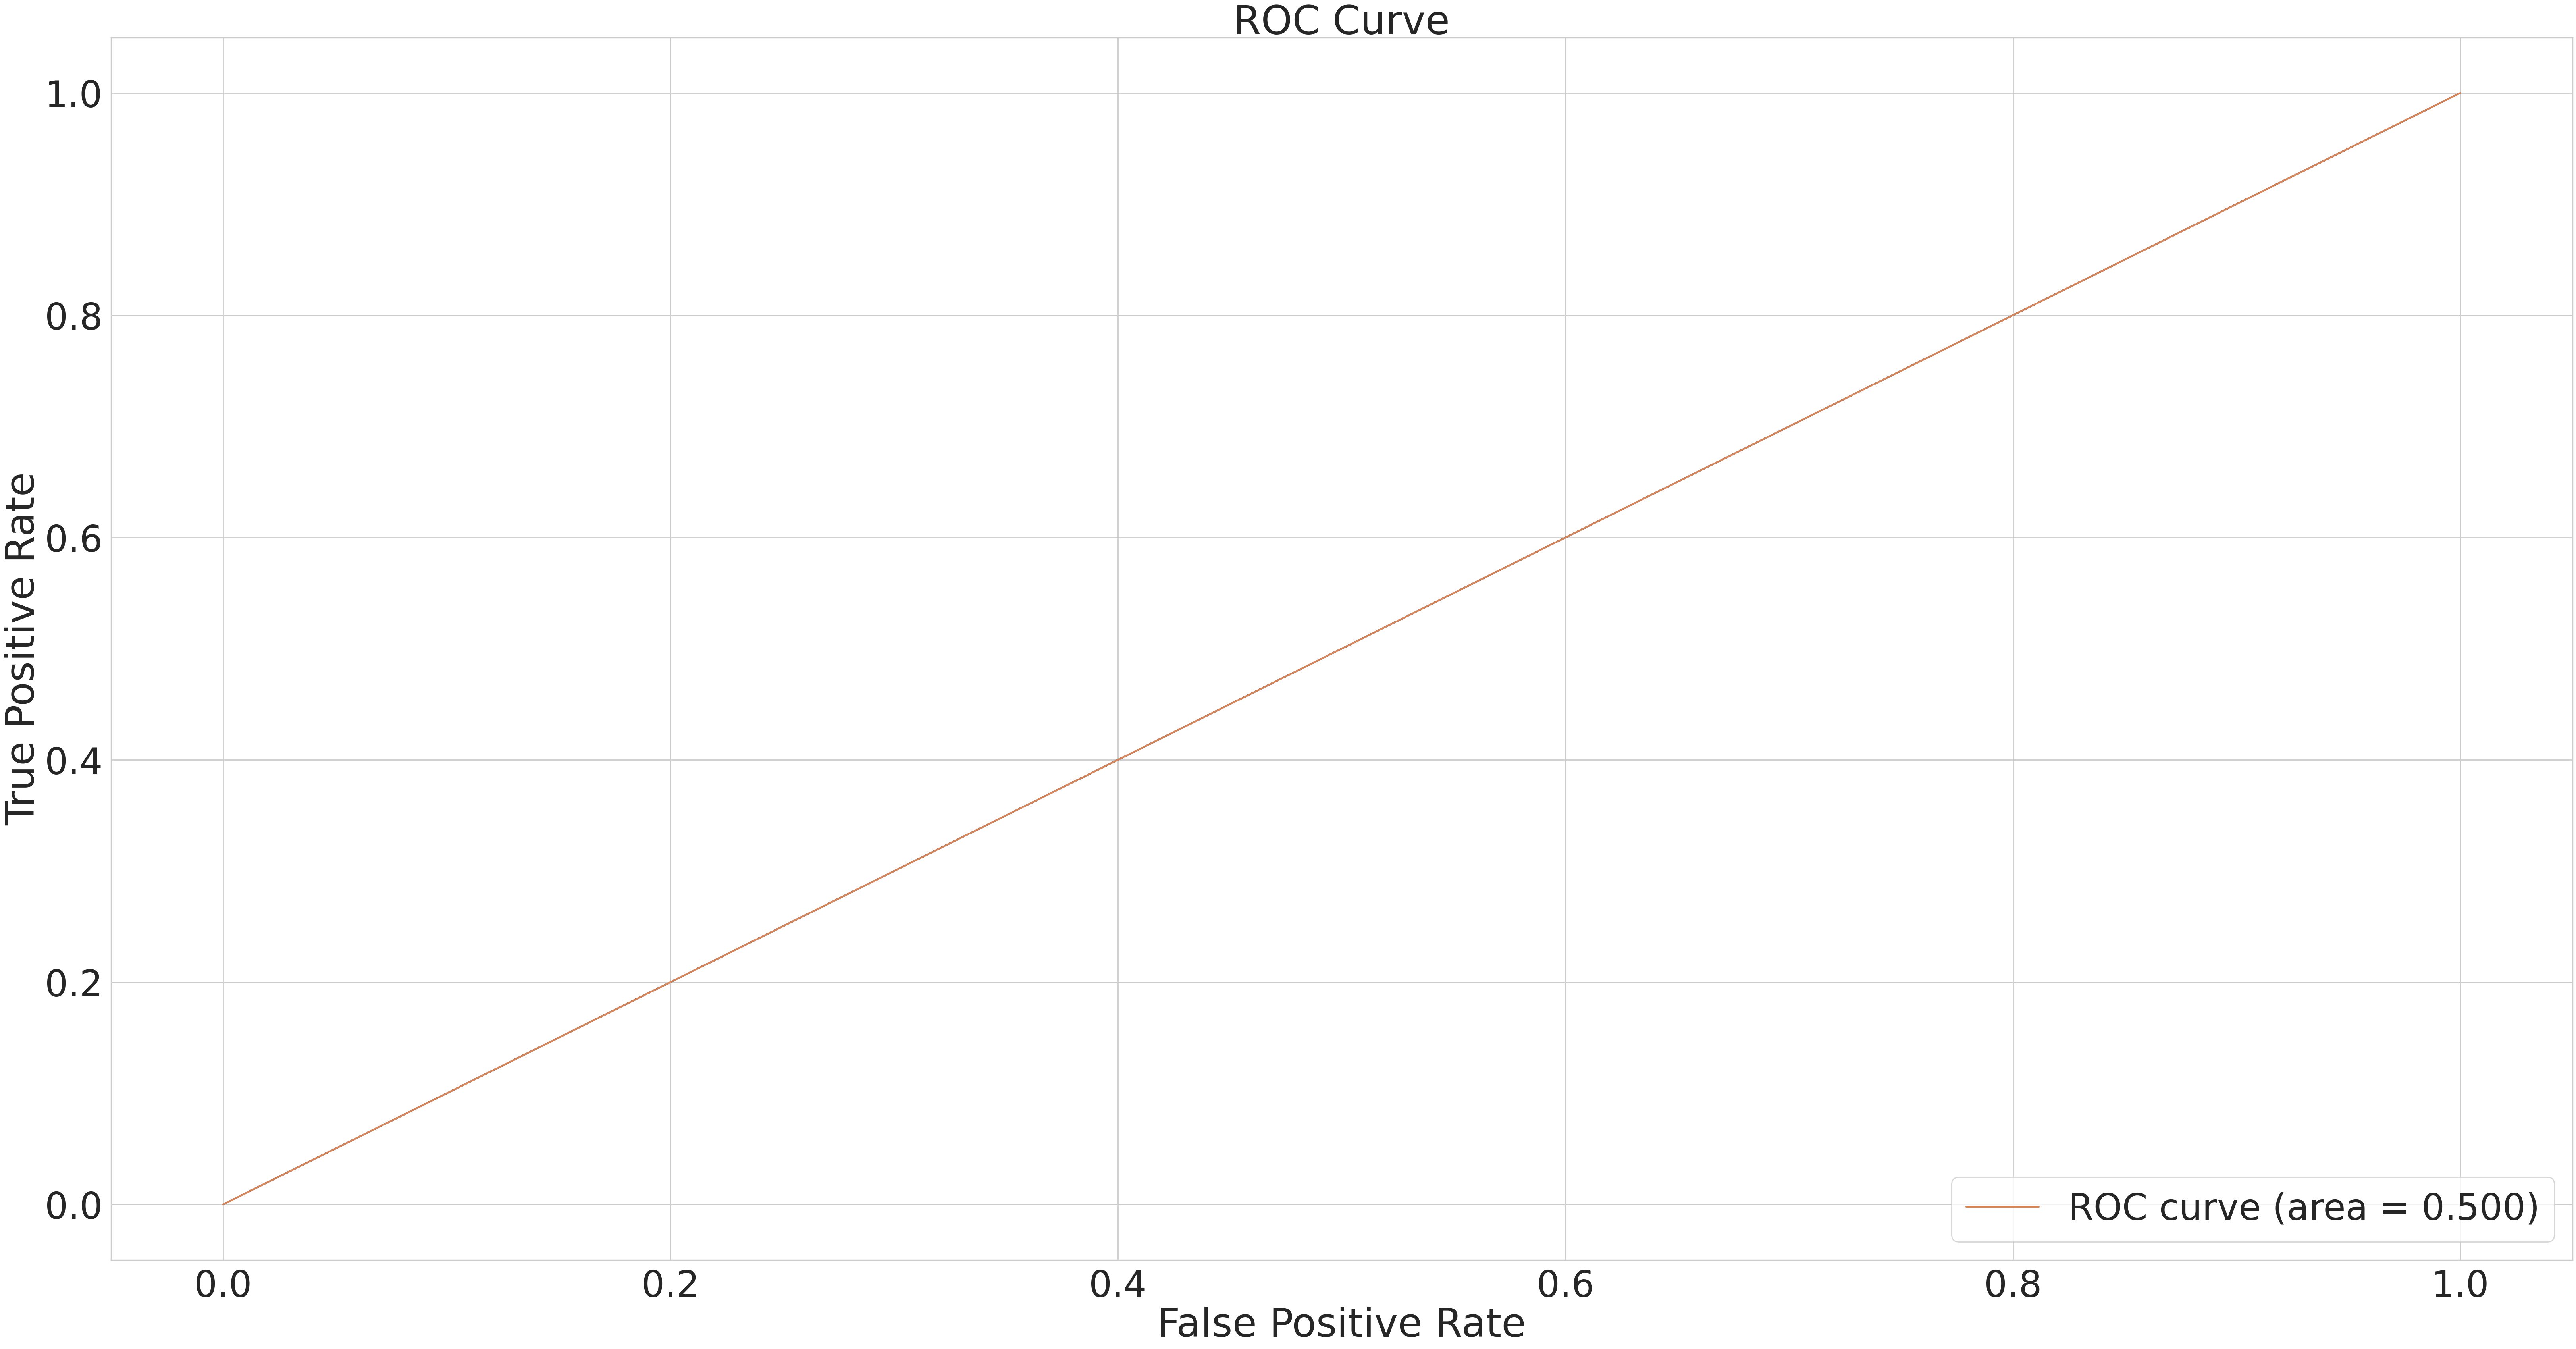

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.3f' % roc_auc )
#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


From the ROC-AUC curve, we can see that the ROC-AUC value is 0.5. A ROC-AUC value of 0.5 means that the model has predicted only 50% of the either classes. This can be explained using a simple analogy. Considering we have a fair coin which has a probability of 0.5 for either head or tail. So if we guess the outcome of a coin flip, it would be correct only 50% of the times. This classifier's result is kind-off the same, there is 50% probability that the outcome of such a model would be correct, which is machine learning terms is pretty bad.

# Logistic Regression - Predicting 'Class' based on all features.


In [ ]:
X=data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
Y=data[['Class']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=101)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.66      0.68       144

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.830


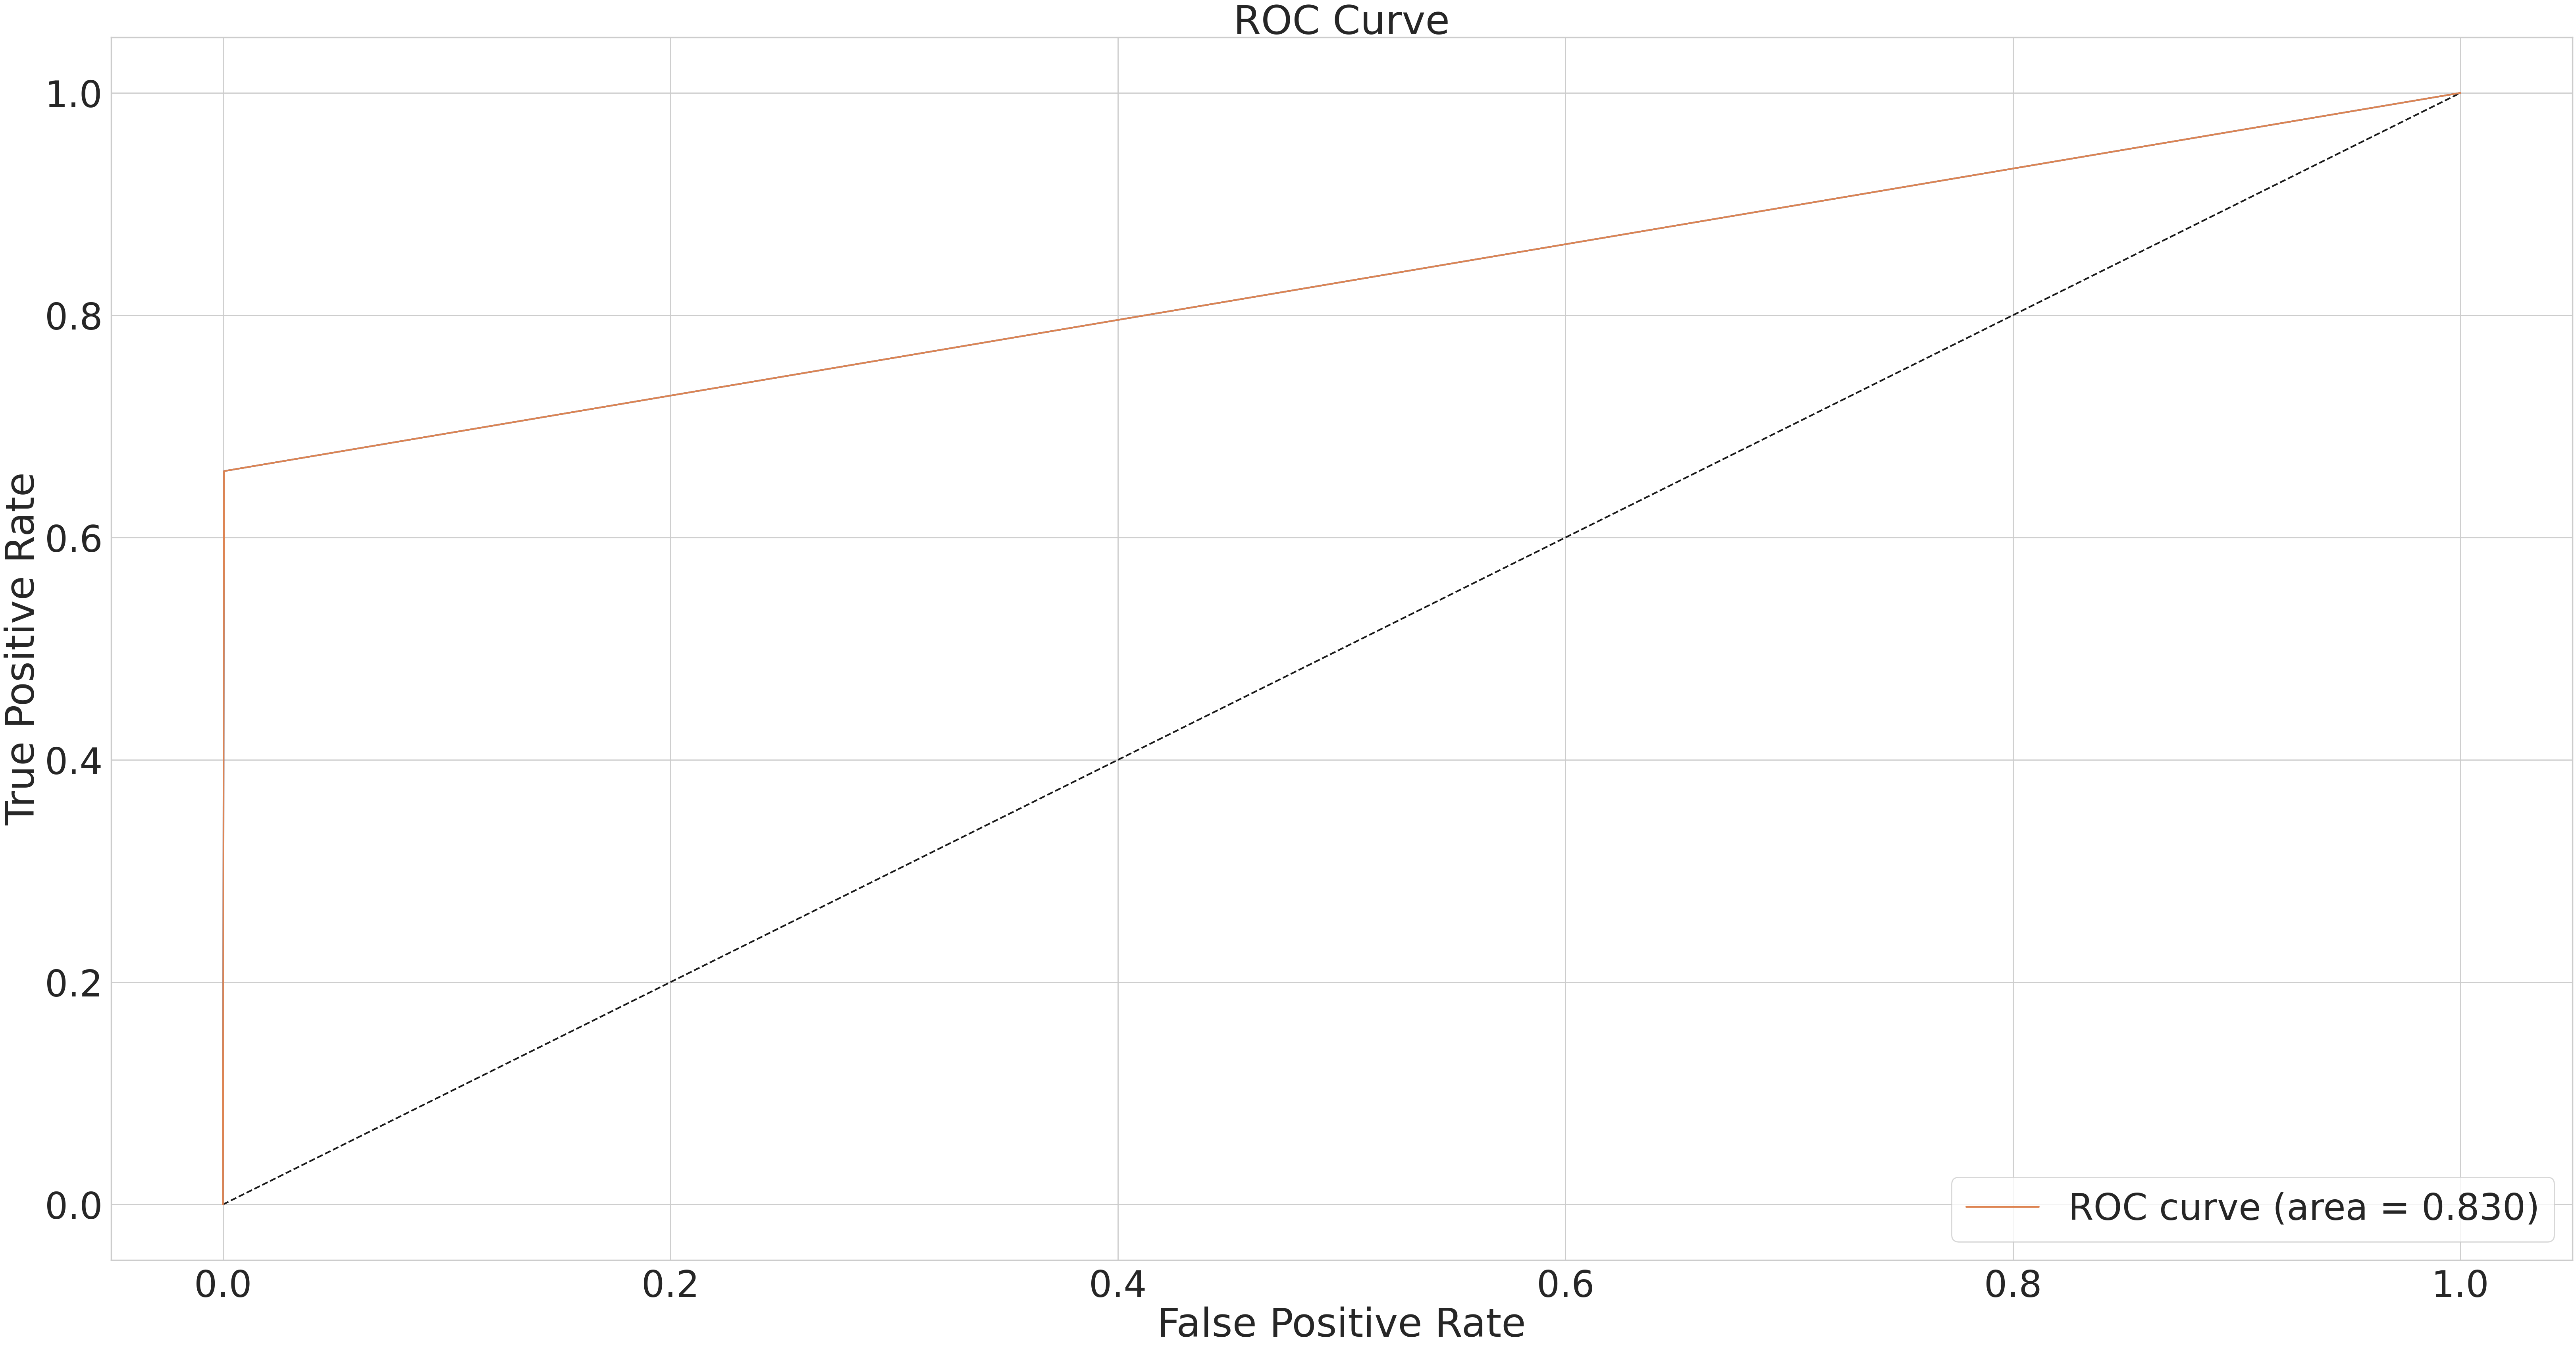

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.3f' % roc_auc )
#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

From the ROC-AUC curve, we can see that the ROC-AUC value is 0.833. The Recall rate is 67% which is way better than the model with 2 features. This also implies the importance of the other features for building the classifier.



#Support Vector Classifier

In [ ]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,predictions))


[[85299     0]
 [  144     0]]


In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.00      0.00      0.00       144

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.500


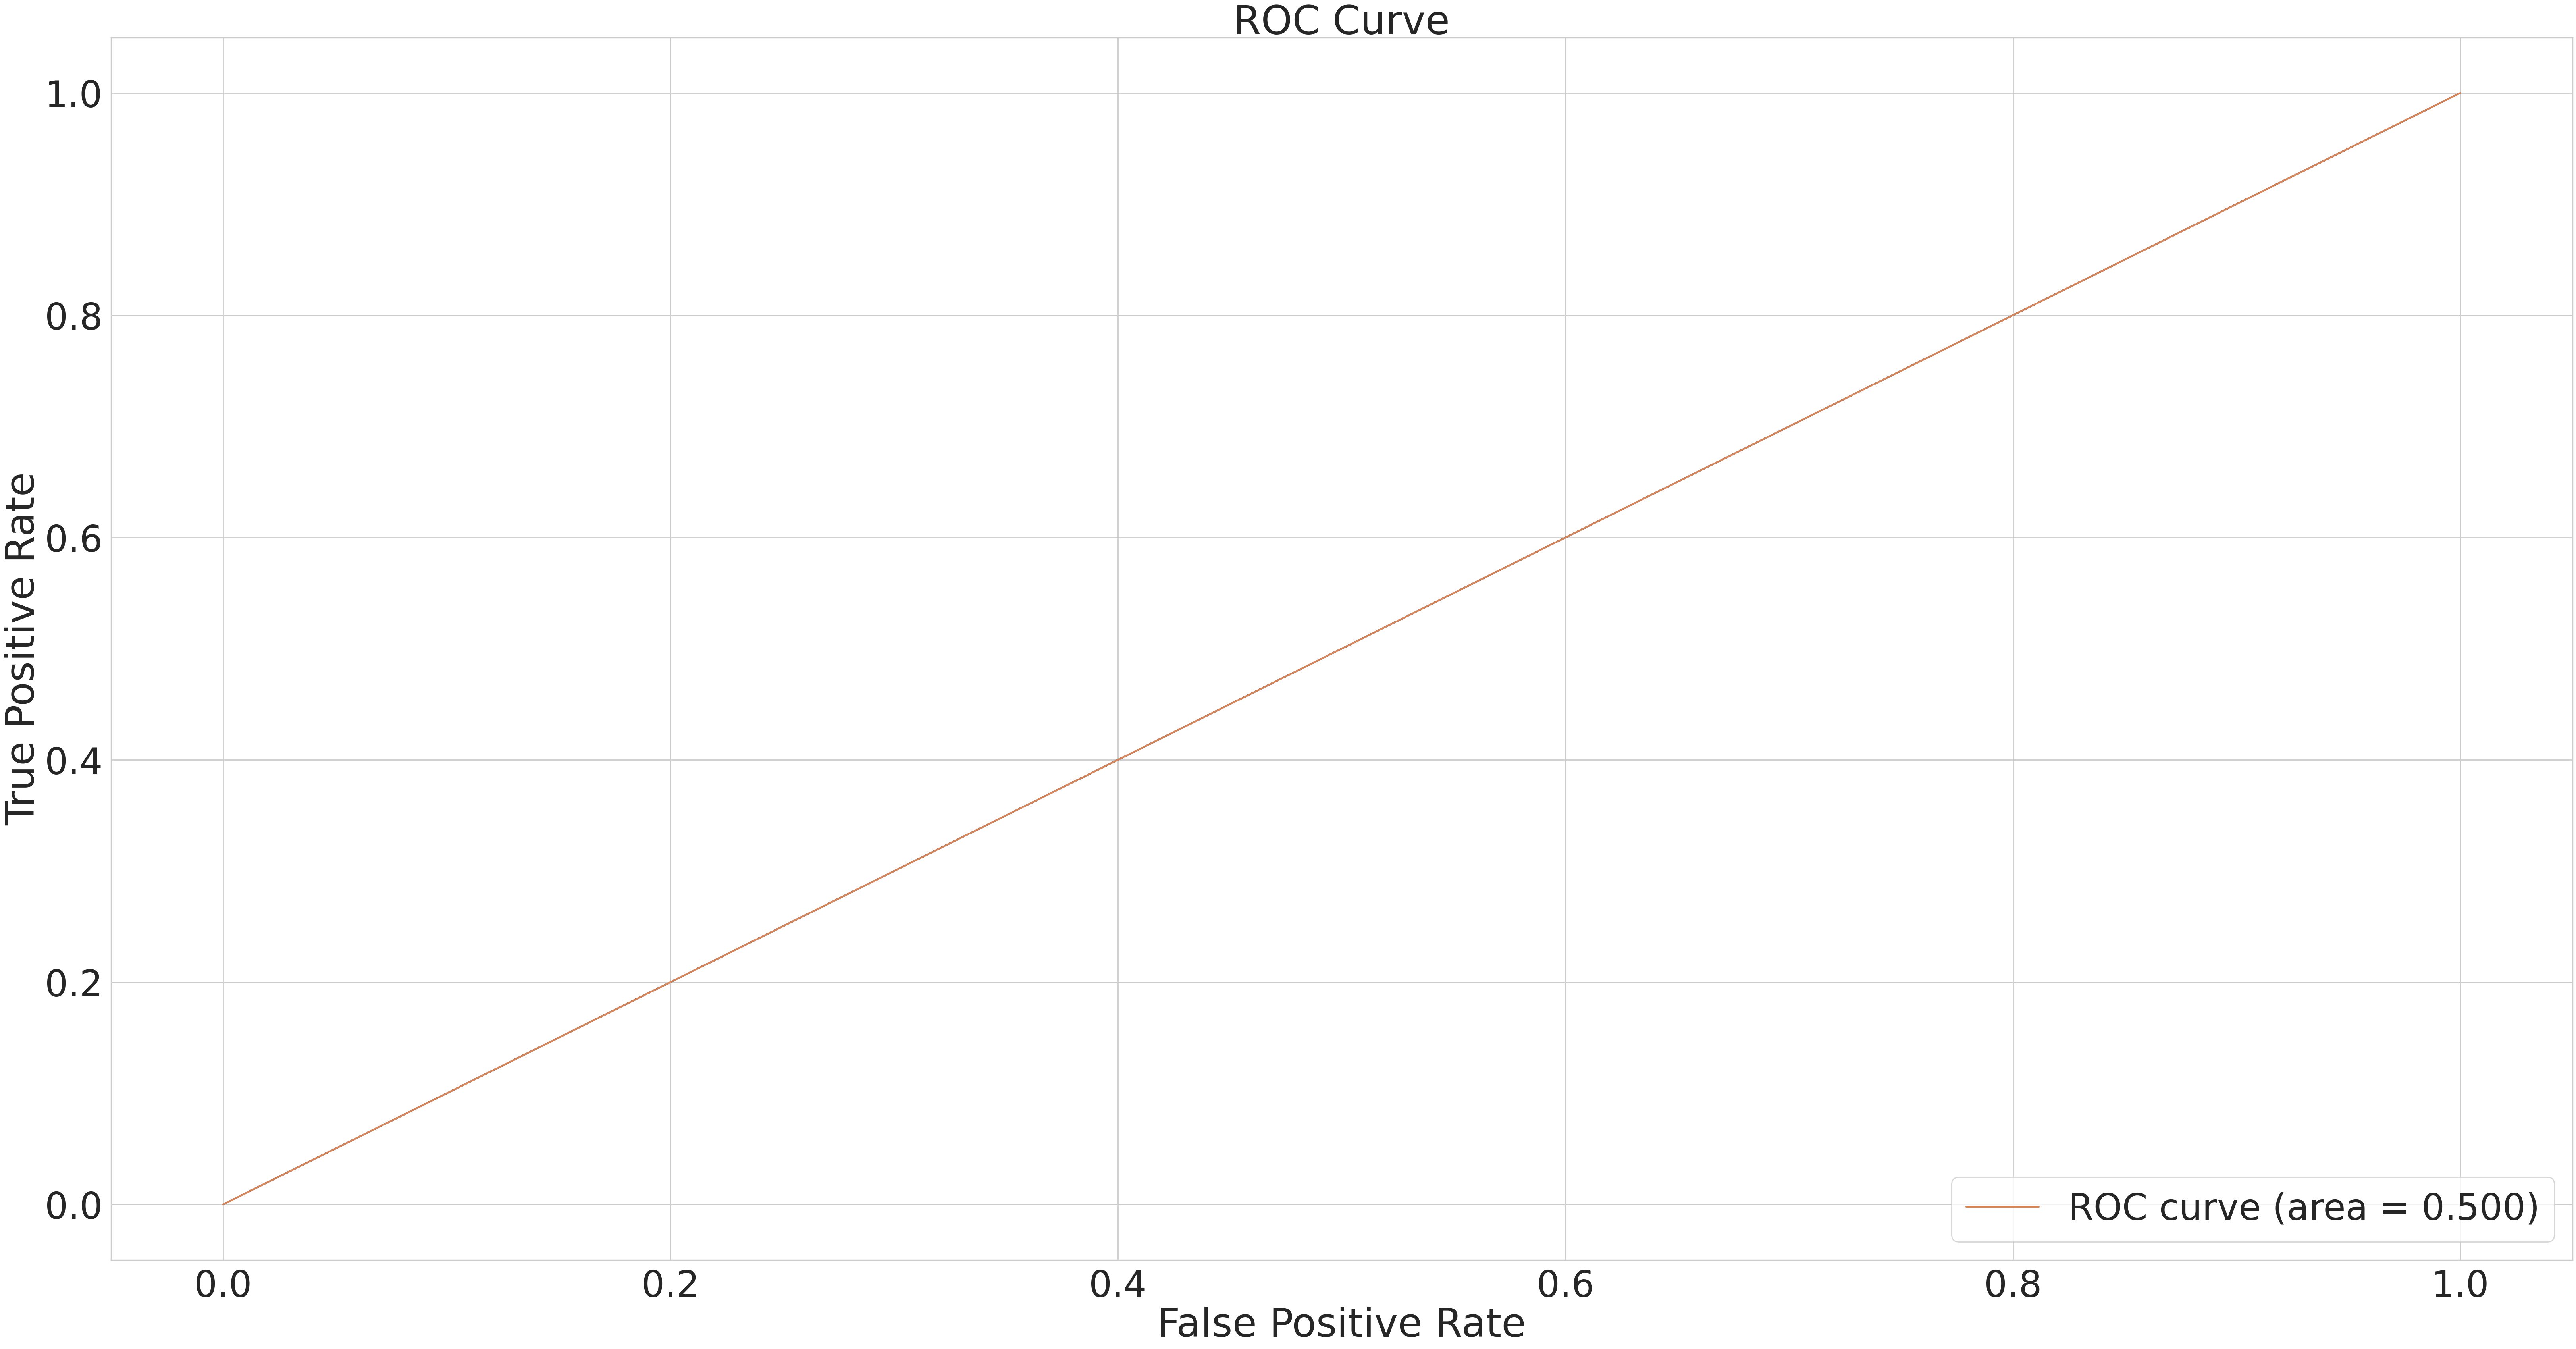

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

This model has a recall of 0% which means Support Vector Machine doesnt perform well on the data. Similar to the 2 feature logistic regression, the ROC-AUC value is 0.5.


# Decision Tree

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.



In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[85259    40]
 [   32   112]]


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.74      0.78      0.76       144

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.889


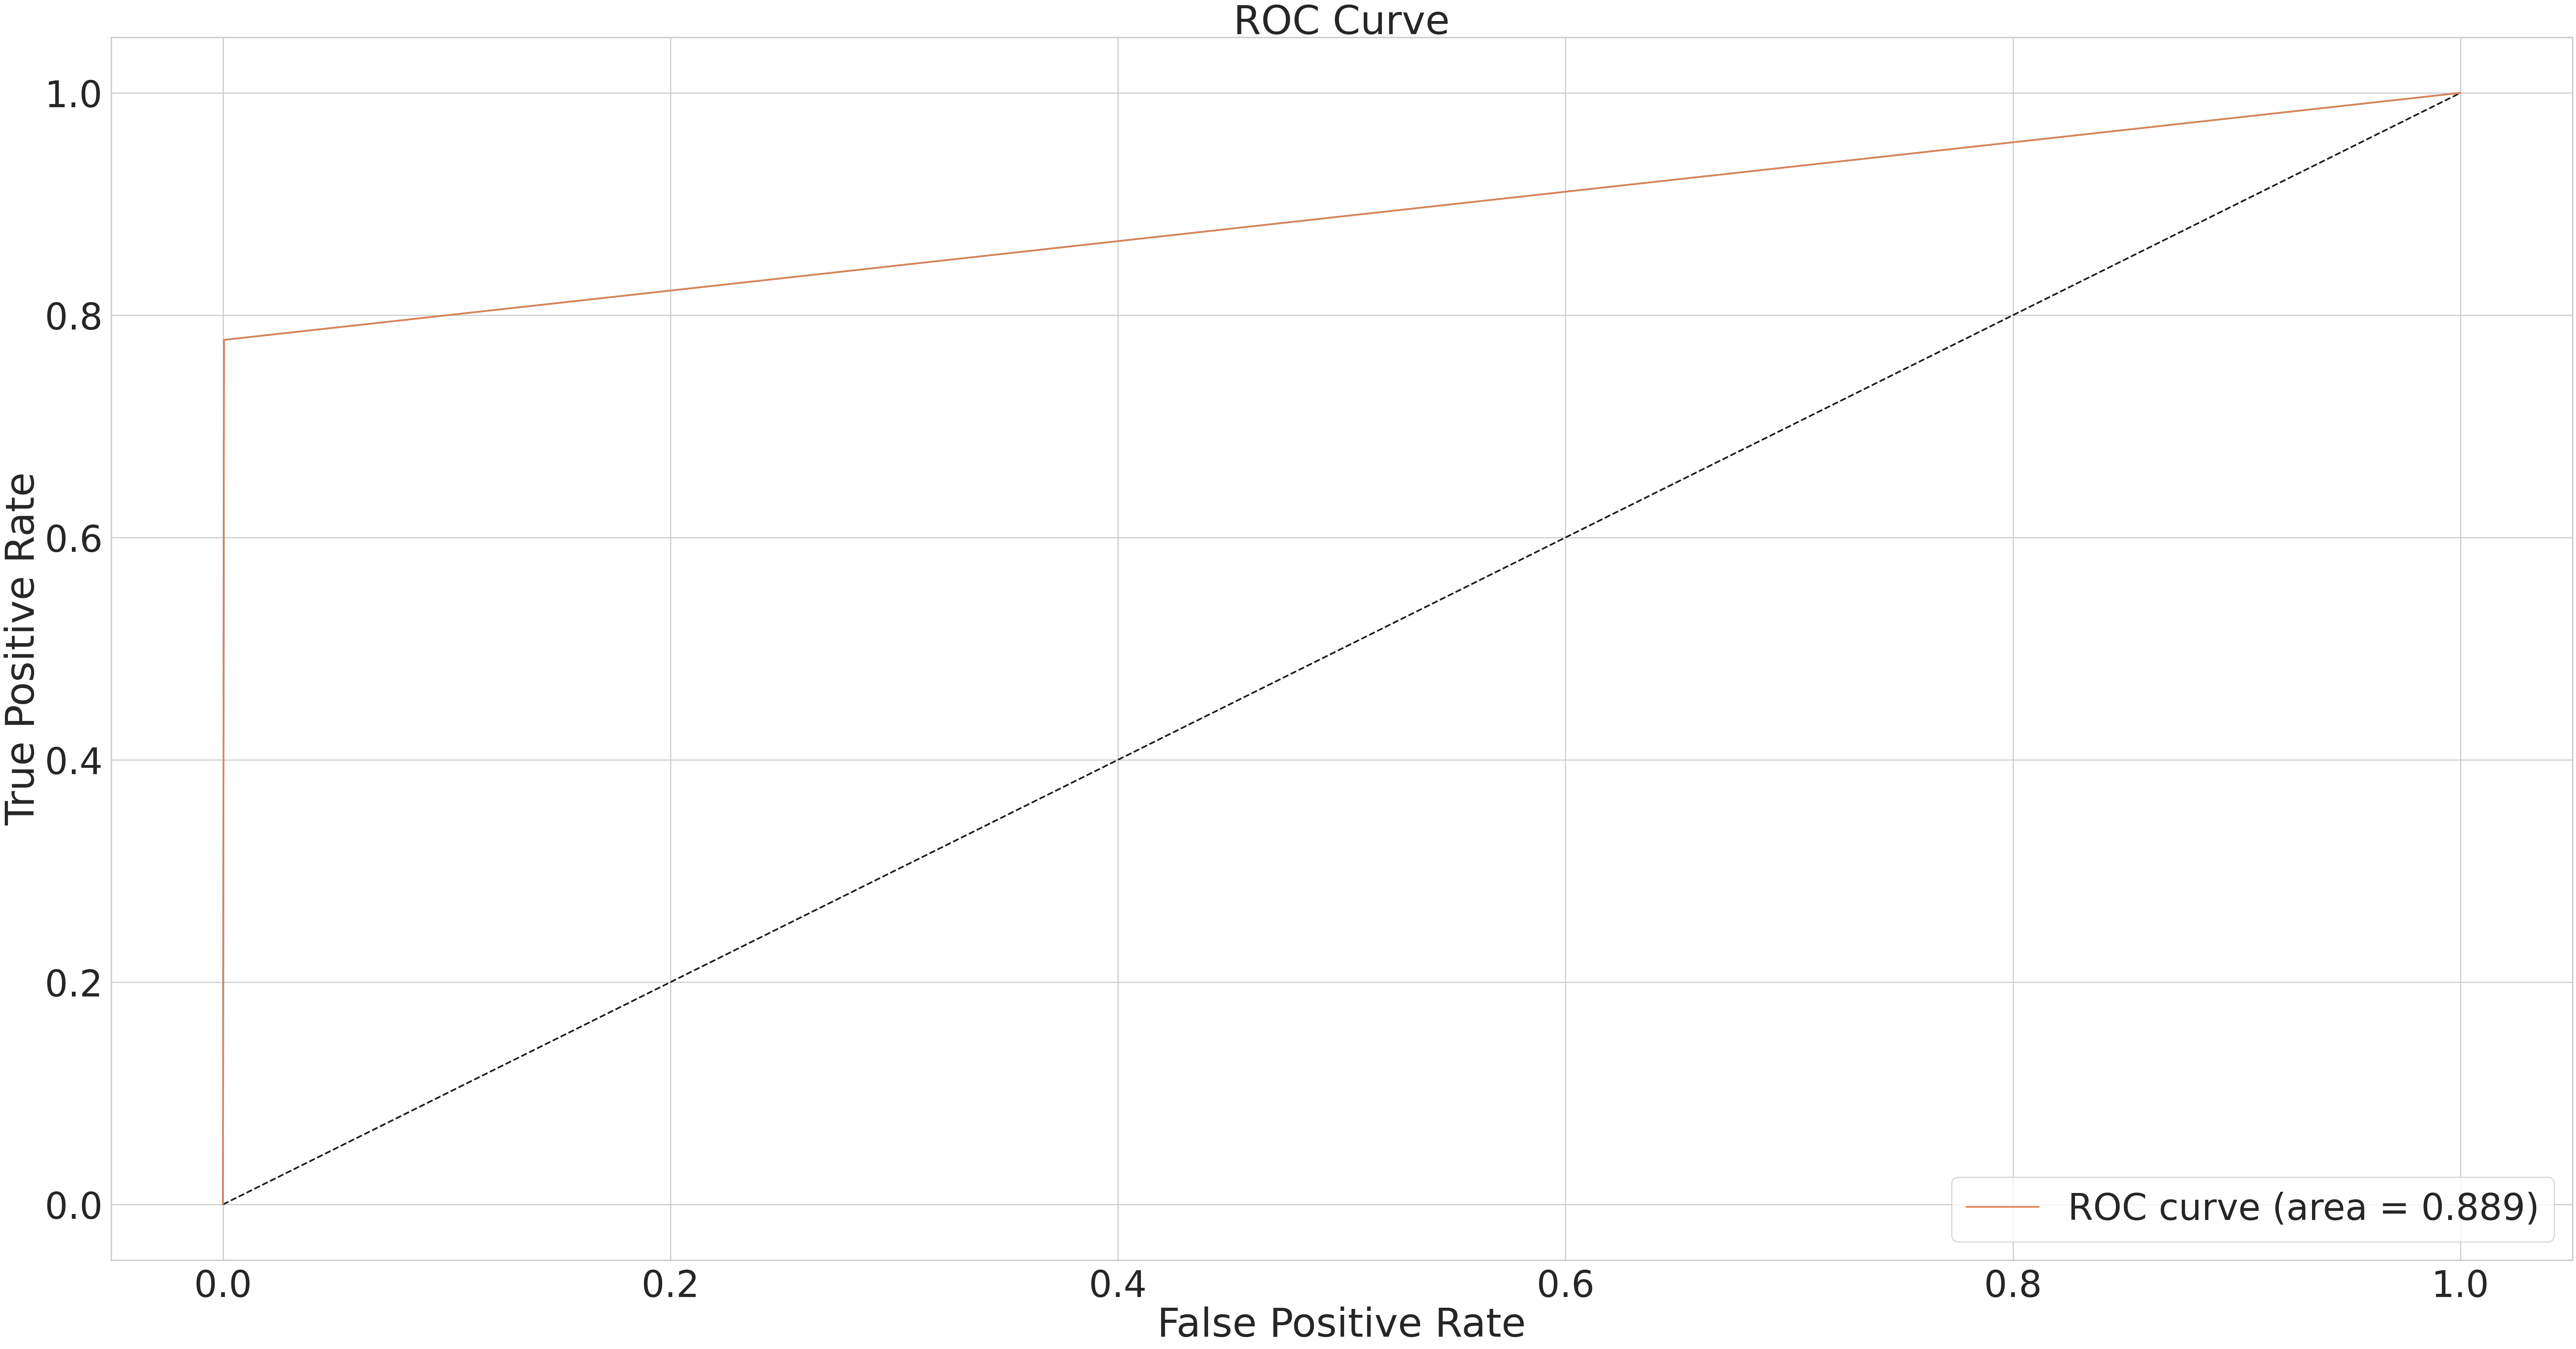

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

While the logistic regression and Support vector Classifier gives a recall of 67% and 0% respectively, Decision tree gives us a very good recall, almost 74%. The ROC-AUC value is also better than the other classifiers which proves the efficacy of the Decision Tree. This prediction can also be improved by hyper-parameter tuning.

# Feature Importance Plot

Feature importance plot indicates the relative importance of each feature when making a prediction.



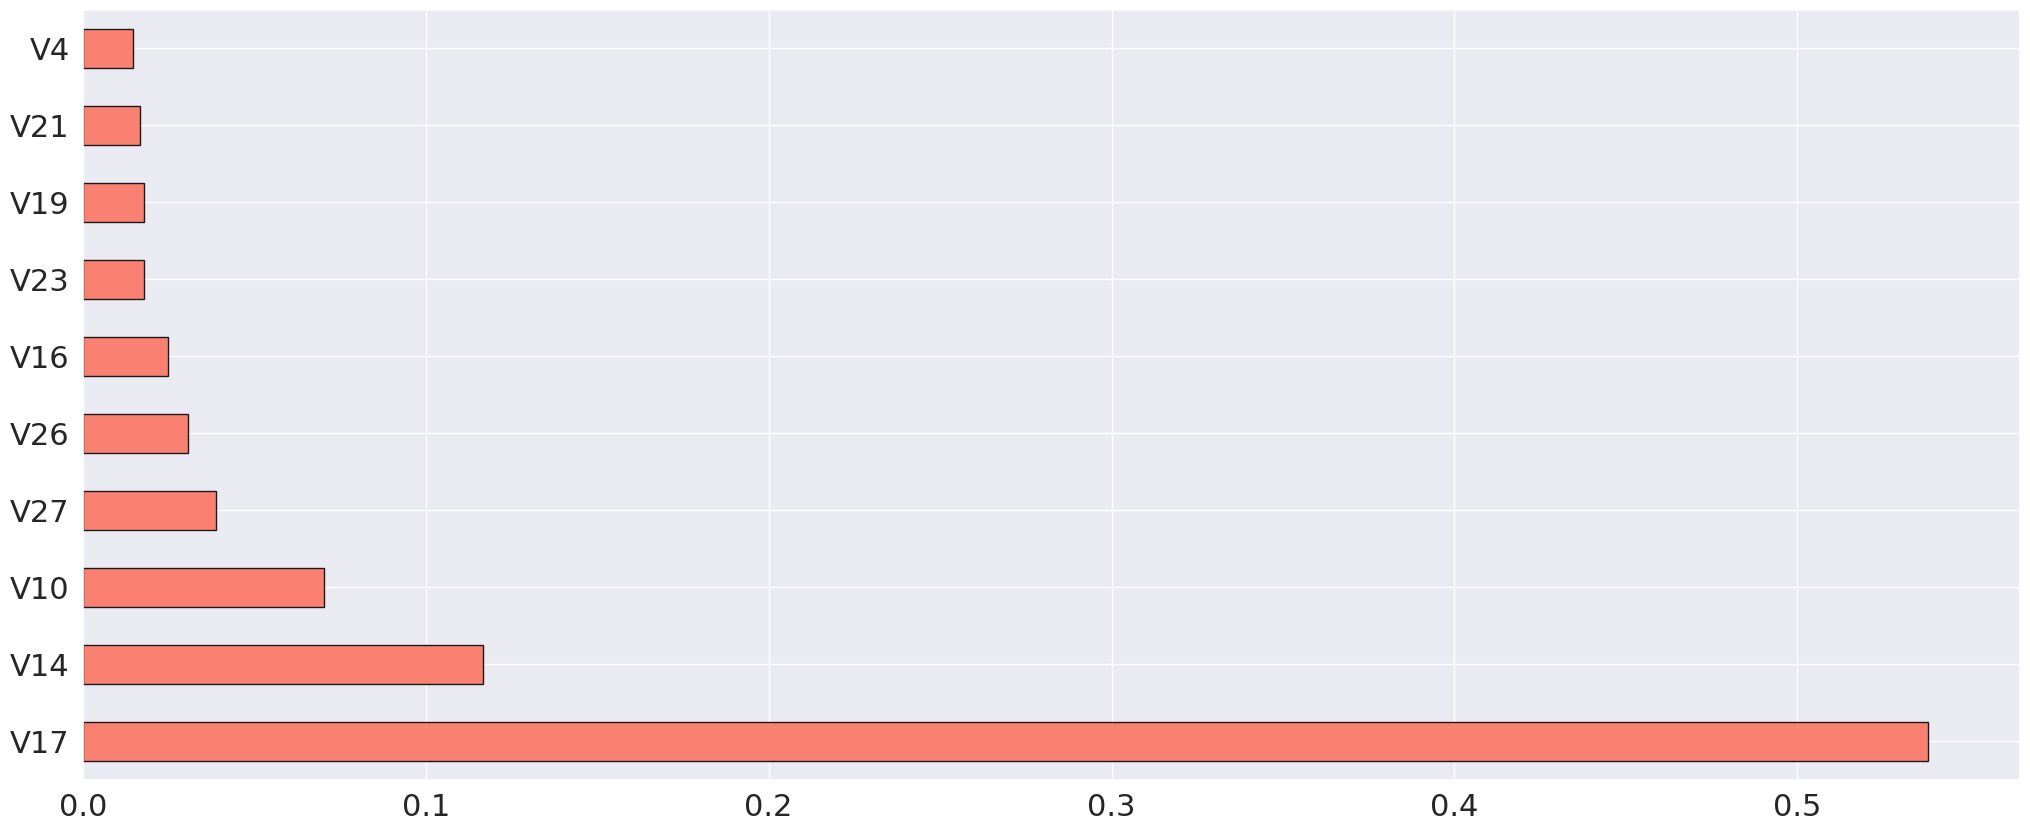

In [50]:
plt.figure(figsize=(25,10))
sns.set(font_scale = 2)
feat_importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',color='salmon',edgecolor='k');

#Random Forest


Random forests algorithms are used for classification and regression. The random forest is an ensemble learning method, composed of multiple decision trees. By averaging out the impact of several decision trees, random forests tend to improve prediction.



In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[85291     8]
 [   28   116]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.94      0.81      0.87       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.882


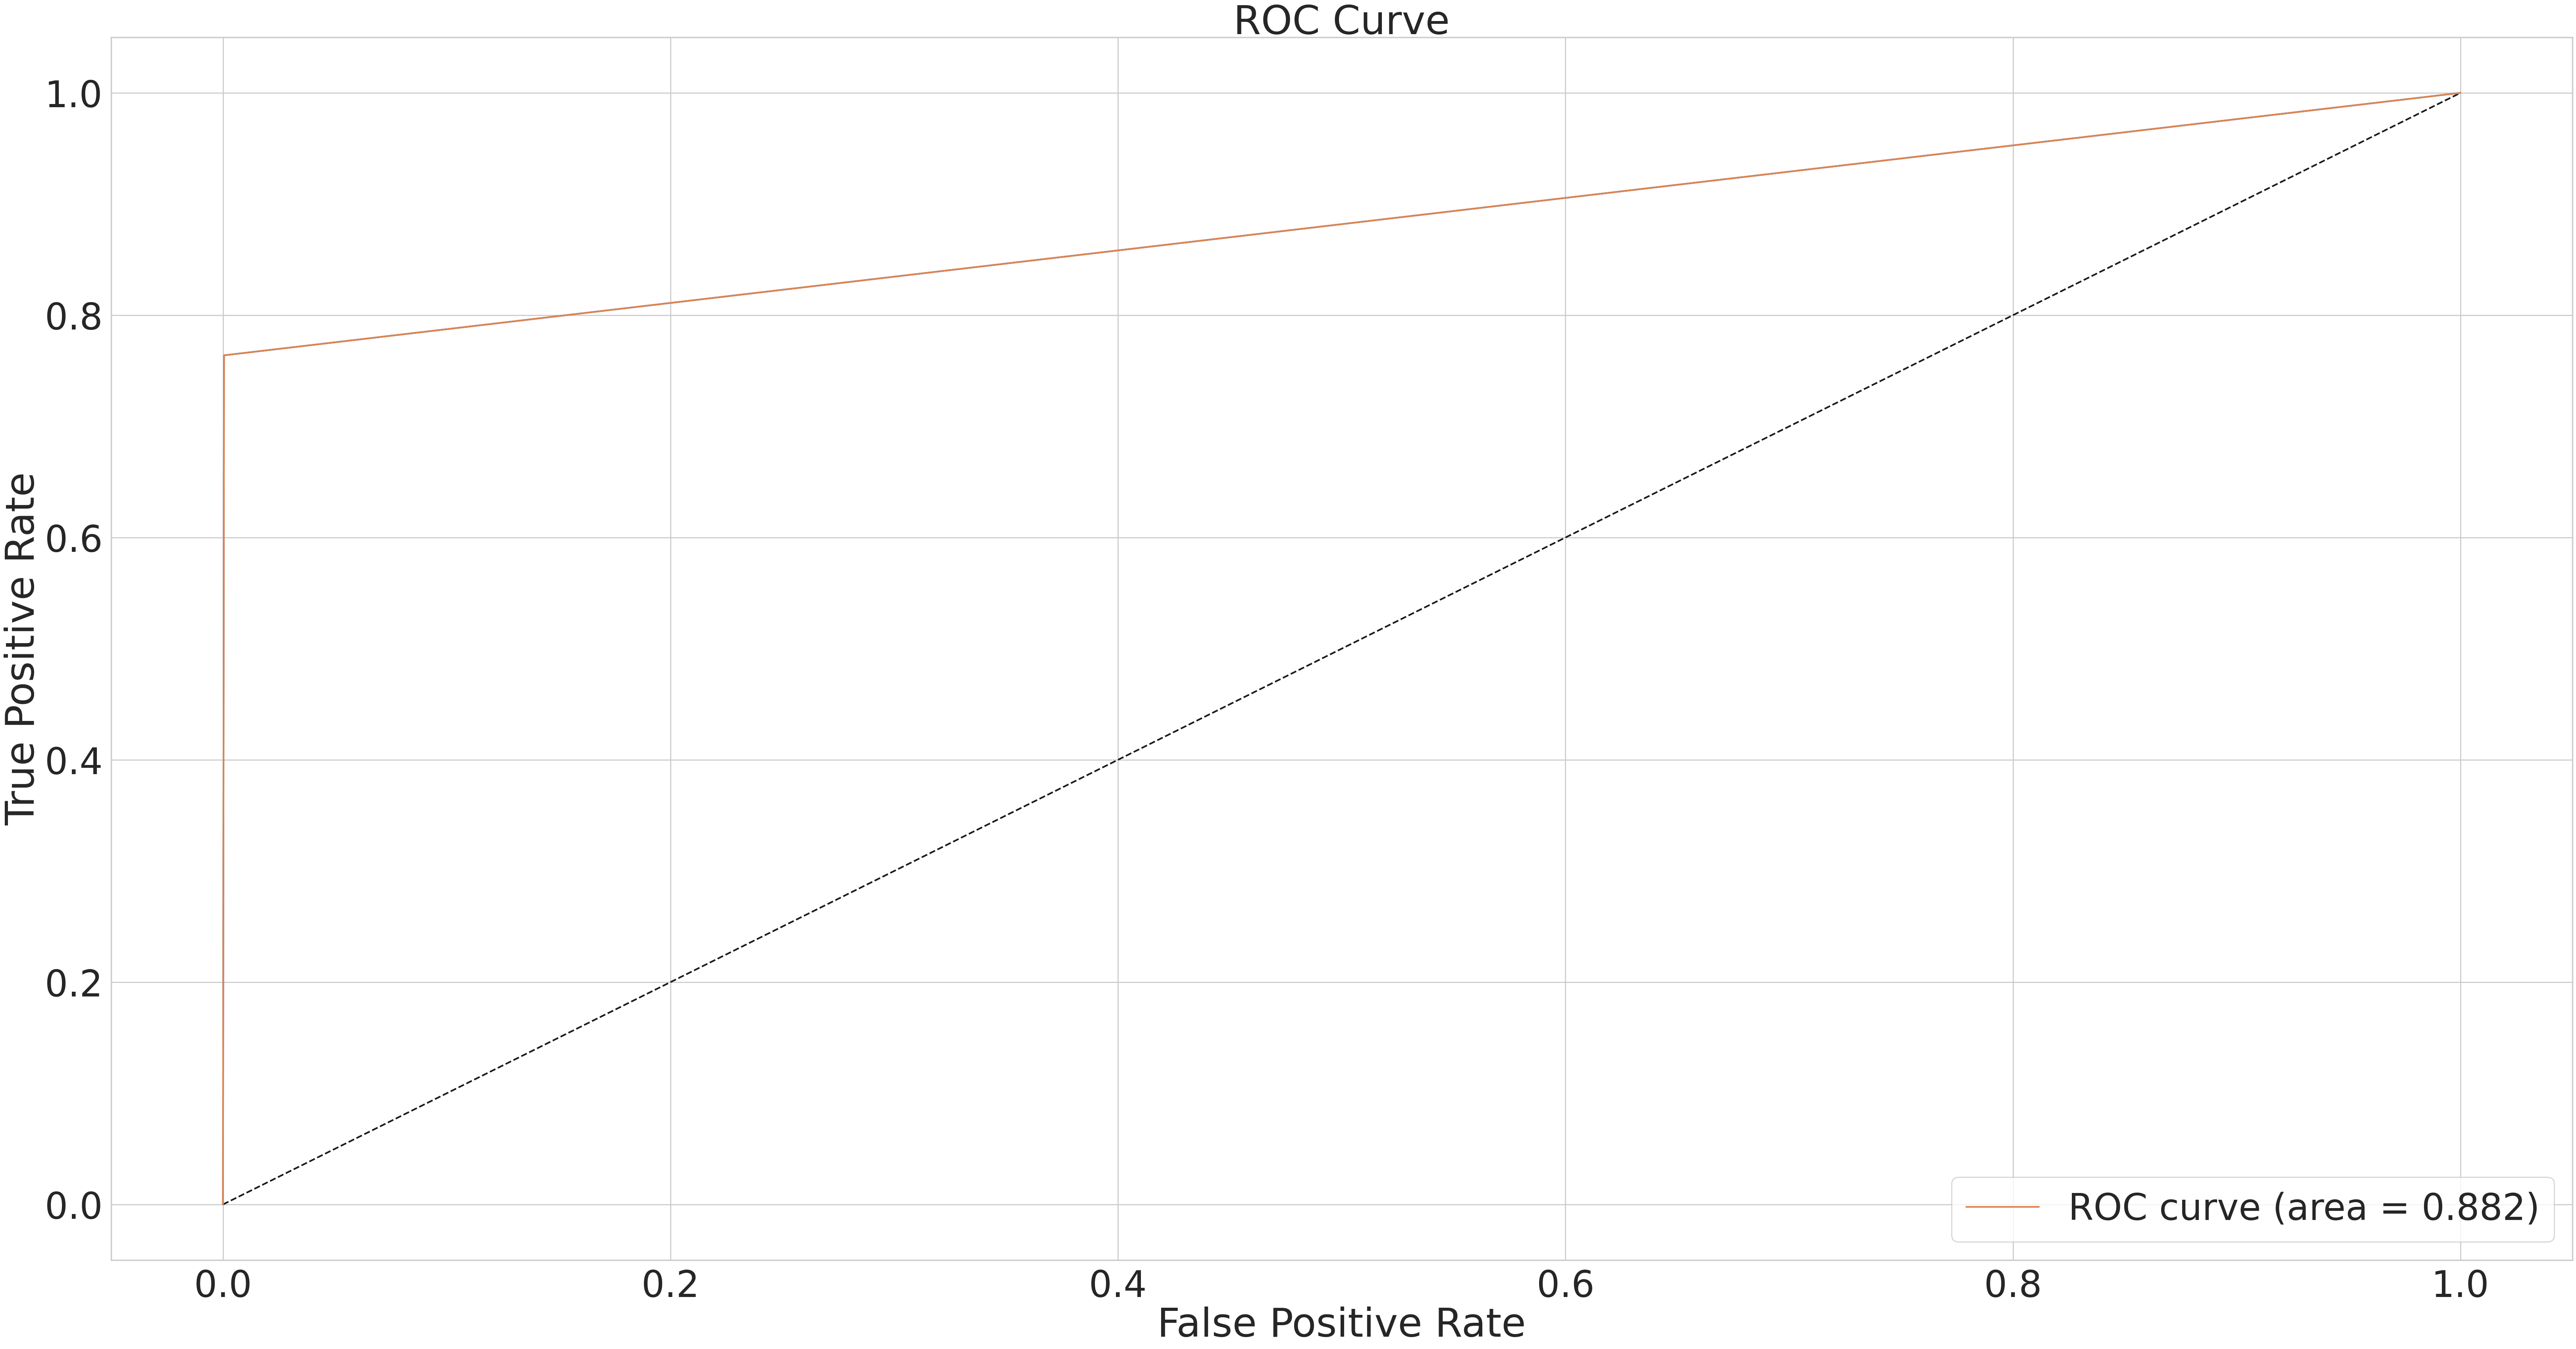

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We can see that using Random Forest, the Recall has improved to 80%.

#Ada Boost Classifier


AdaBoost, short for “Adaptive Boosting”, is the first practical boosting algorithm proposed by Freund and Schapire in 1996. It focuses on classification problems and aims to convert a set of weak classifiers into a strong one.



In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [ ]:
predictions = ada.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,predictions))


[[85255    44]
 [   34   110]]


In [ ]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.71      0.76      0.74       144

    accuracy                           1.00     85443
   macro avg       0.86      0.88      0.87     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.882


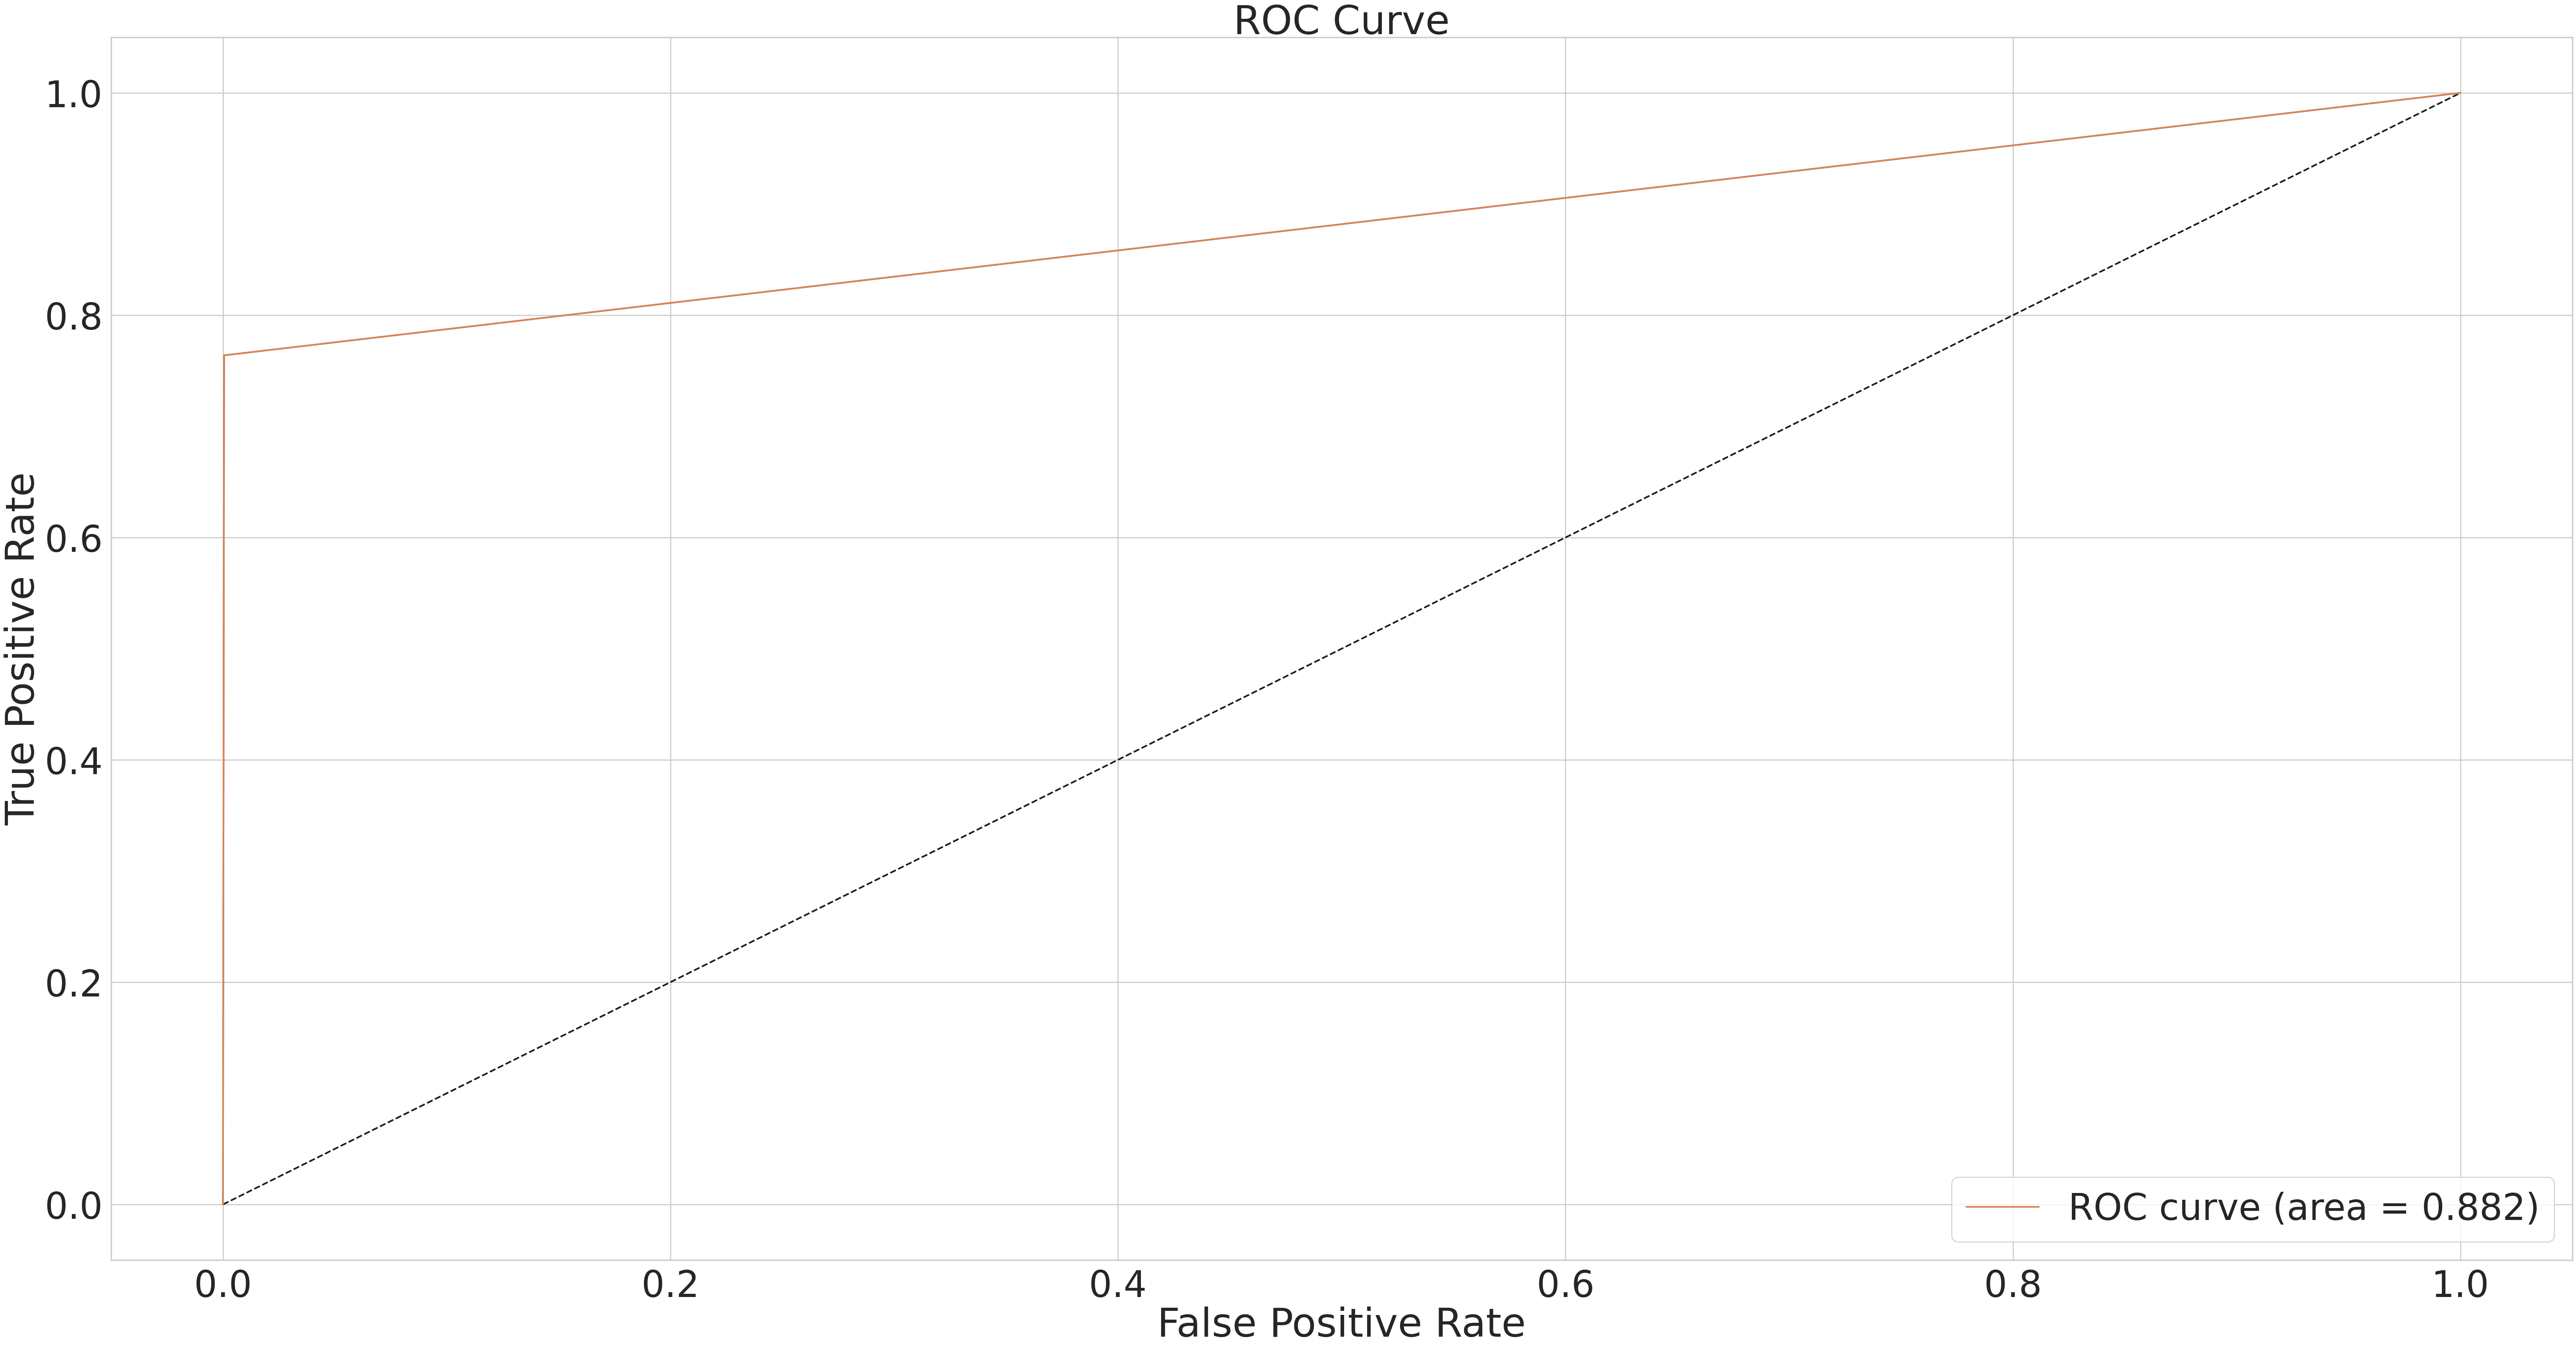

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Ada-Boost gives a recall of 76% which shows that it performs worse than the random forest classifier.



#Neural Network


A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.



In [ ]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(500,), max_iter=10000)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc

0.4375

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[85241    58]
 [   81    63]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.52      0.44      0.48       144

    accuracy                           1.00     85443
   macro avg       0.76      0.72      0.74     85443
weighted avg       1.00      1.00      1.00     85443



ROC AUC: 0.718


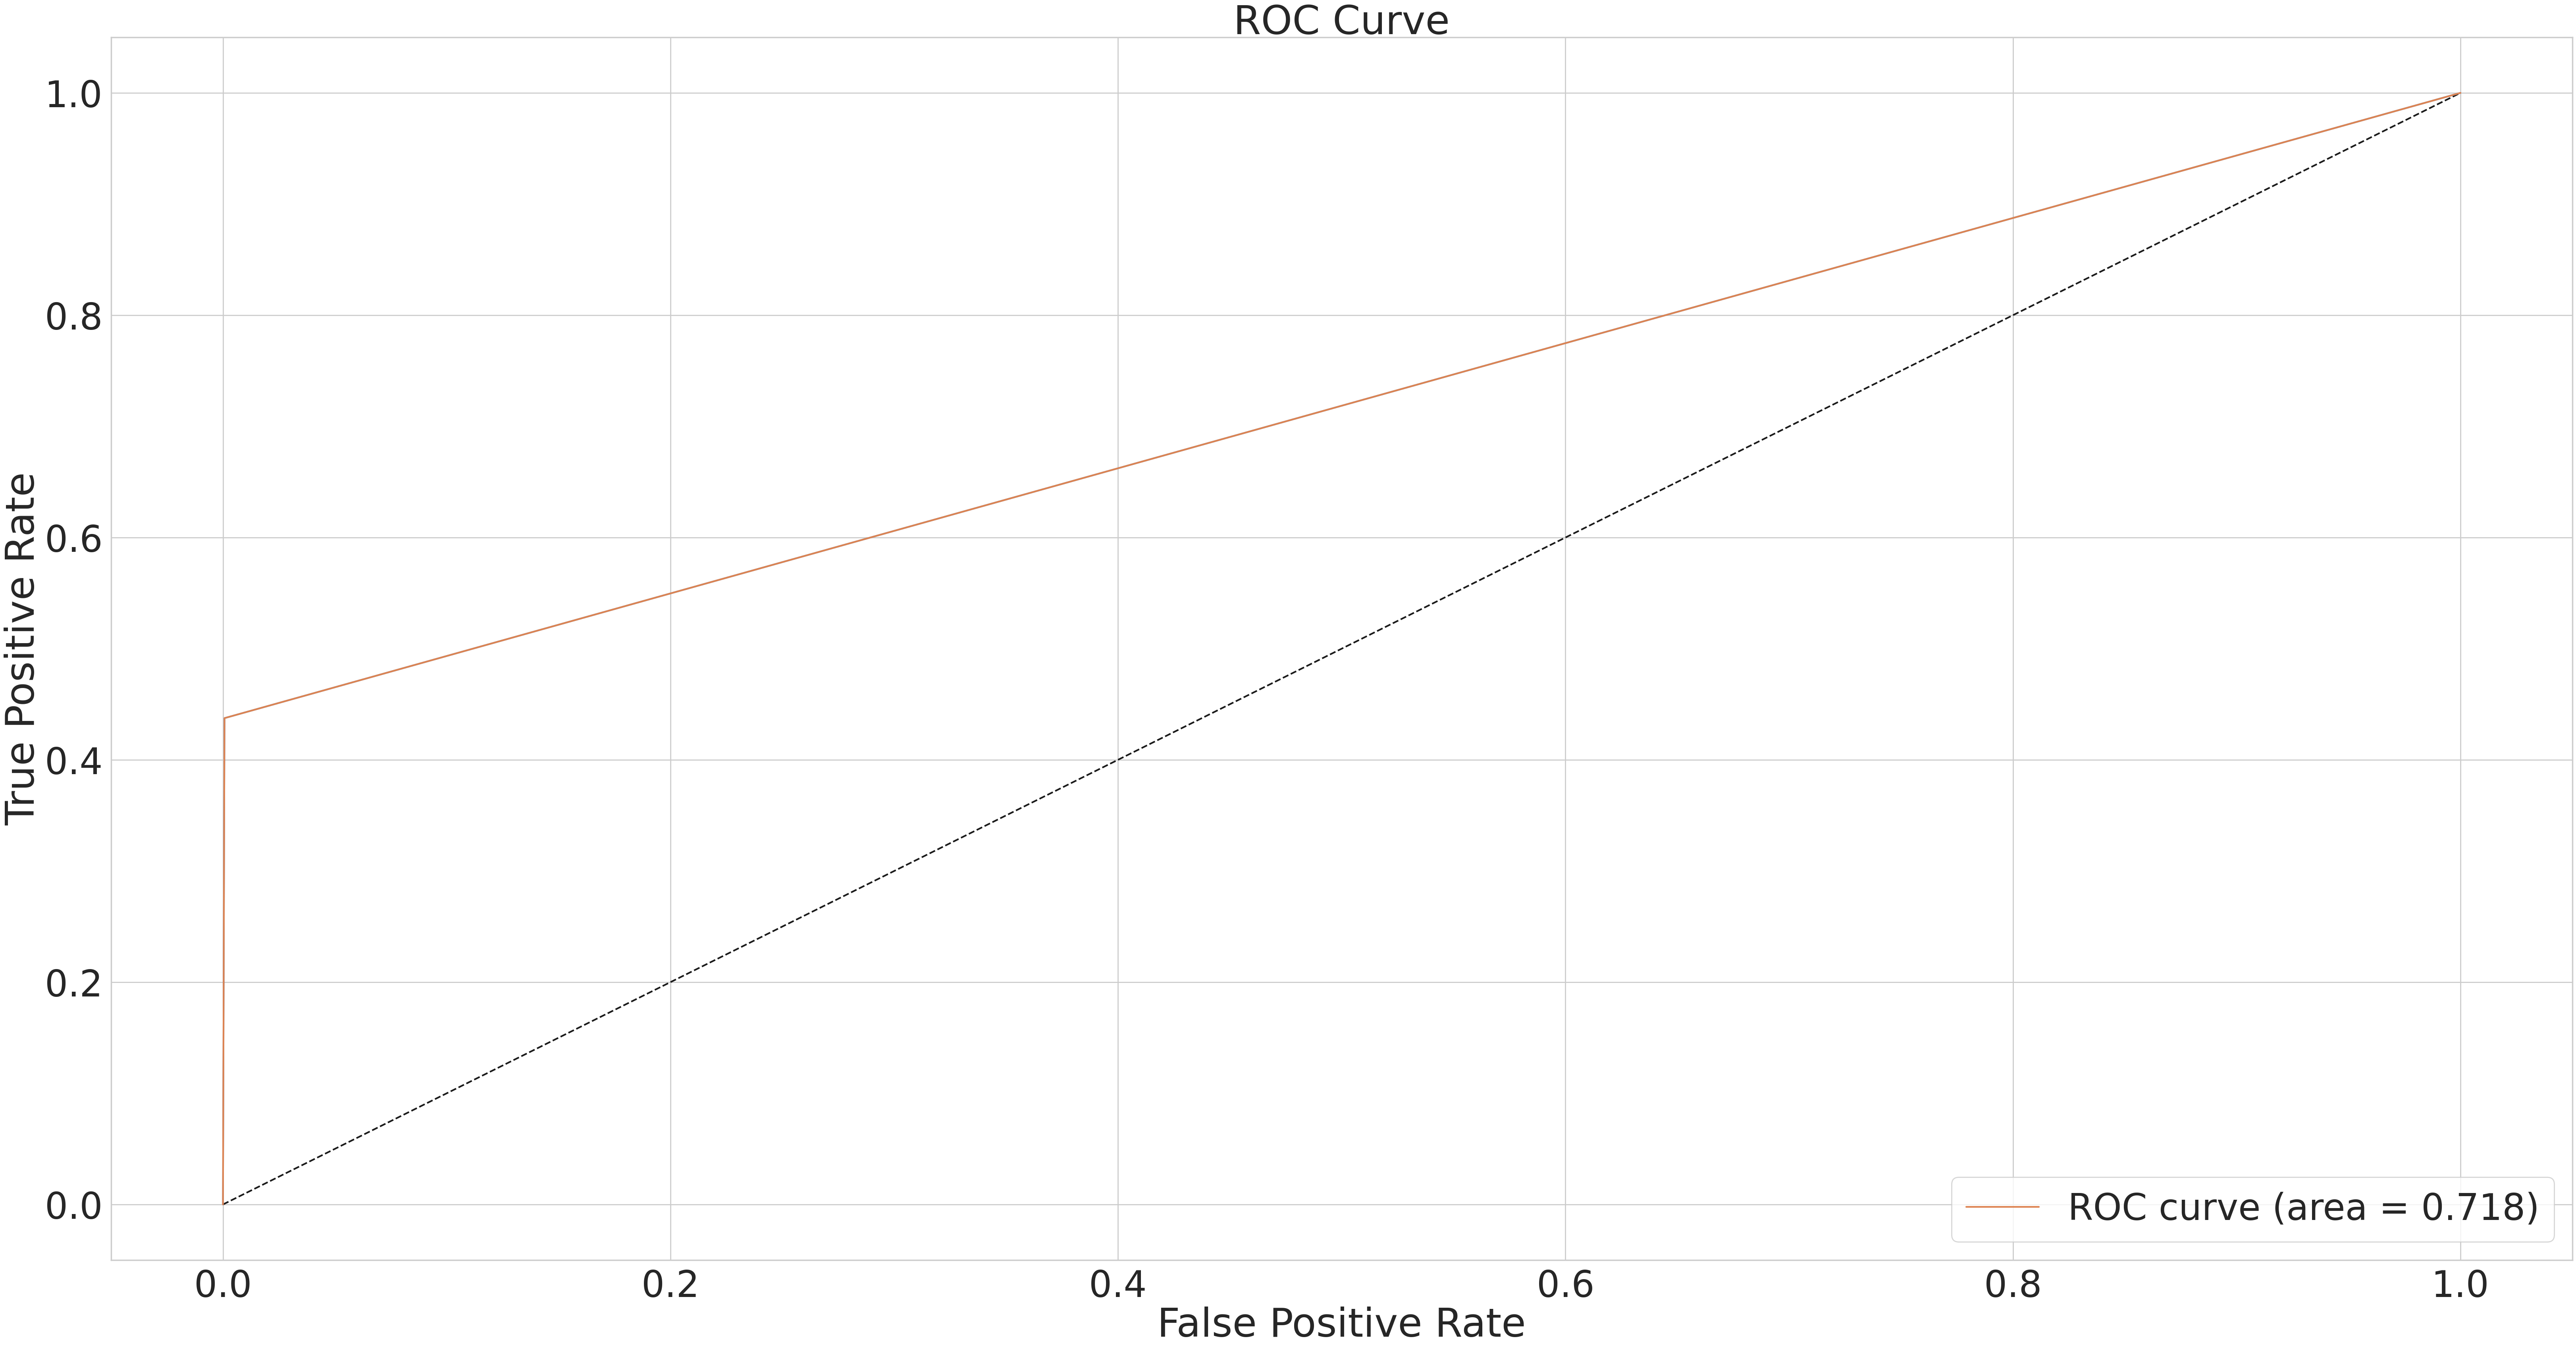

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print ('ROC AUC: %0.3f' % roc_auc )

#Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()